In [ ]:
# Reseñas de Google Maps: Edición Restaurante de Lima, Perú
# Alrededor de 378969 mil reseñas únicas de restaurantes de los distritos del centro de Lima, Perú
# 📊 Acerca del conjunto de datos


In [1]:
# Cargando el dataset reseñas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración de rutas
BASE_DIR = Path('..')
DATA_RAW = BASE_DIR / 'data' / 'raw'
DATA_PROCESSED = BASE_DIR / 'data' / 'processed'

# Cargar datasets
df_reseñas = pd.read_csv(DATA_RAW / 'Lima_Restaurants_2025_08_13.csv')
df_restaurantes = pd.read_csv(DATA_RAW / 'restaurant_metadata.csv')

print(f"✅ Dataset de reseñas cargado: {len(df_reseñas)} registros")
print(f"✅ Dataset de restaurantes cargado: {len(df_restaurantes)} registros")


✅ Dataset de reseñas cargado: 378969 registros
✅ Dataset de restaurantes cargado: 1055 registros


In [9]:
# ==========================================
# EXPLORACIÓN INICIAL DE LOS DATOS (EDA)
# ==========================================


In [2]:
# EDA del dataset reseñas
# 1.1 Obtener un resumen del DataFrame
print("=" * 60)
print("INFORMACIÓN DEL DATASET DE RESEÑAS")
print("=" * 60)
df_reseñas.info()


INFORMACIÓN DEL DATASET DE RESEÑAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378969 entries, 0 to 378968
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_review       378969 non-null  object
 1   caption         200455 non-null  object
 2   relative_date   378969 non-null  object
 3   review_date     378969 non-null  object
 4   retrieval_date  378969 non-null  object
 5   rating          378969 non-null  int64 
 6   username        378967 non-null  object
 7   n_review_user   378969 non-null  int64 
 8   url_user        378969 non-null  object
 9   url_place       378969 non-null  object
 10  id_place        378969 non-null  object
dtypes: int64(2), object(9)
memory usage: 31.8+ MB


In [3]:
# 1.2 Obtener un resumen estadístico de las columnas numéricas
df_reseñas.describe()


,rating,n_review_user
count,378969.000000,378969.000000
mean,4.310952,51.885112
std,1.070956,139.699019
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,14.000000
75%,5.000000,55.000000
max,5.000000,42202.000000


In [4]:
# 1.3 Resumen estadístico completo (incluyendo categóricas)
df_reseñas.describe(include='all')


,id_review,caption,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place,id_place
count,378969,200455,378969,378969,378969,378969.000000,378967,378969.000000,378969,378969,378969
unique,378967,173927,109,378969,378969,NaN,216336,NaN,230892,1012,1012
top,ChZDSUhNMG9nS0VJQ0FnSURiMlBPTENnEAE,Excelente,Hace 2 años,2019-08-14 02:55:32.748162,2025-08-12 02:55:32.748162,NaN,Carlos,NaN,https://www.google.com/maps/contrib/1029978629...,https://www.google.com/maps/place/?q=place_id:...,ChIJU-JWWR7IBZERfbLL1w-dyj0
freq,2,1796,60060,1,1,NaN,83,NaN,69,3000,3000
mean,NaN,NaN,NaN,NaN,NaN,4.310952,NaN,51.885112,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.070956,NaN,139.699019,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,14.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,55.000000,NaN,NaN,NaN


In [5]:
# 1.4 Verificar cuántos valores únicos hay en cada columna
print("\n📊 Valores únicos por columna:")
print(df_reseñas.nunique())



📊 Valores únicos por columna:
id_review         378967
caption           173927
relative_date        109
review_date       378969
retrieval_date    378969
rating                 5
username          216336
n_review_user       1044
url_user          230892
url_place           1012
id_place            1012
dtype: int64


In [6]:
# 1.5 Verificar cuántos valores nulos hay en cada columna
print("\n🔍 Valores nulos por columna:")
print(df_reseñas.isnull().sum())



🔍 Valores nulos por columna:
id_review              0
caption           178514
relative_date          0
review_date            0
retrieval_date         0
rating                 0
username               2
n_review_user          0
url_user               0
url_place              0
id_place               0
dtype: int64


In [7]:
# Estadísticas básicas de ratings
print("\n📈 Estadísticas de ratings:")
print(df_reseñas['rating'].describe())



📈 Estadísticas de ratings:
count    378969.000000
mean          4.310952
std           1.070956
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64


In [80]:
# ==========================================
# ANÁLISIS UNIVARIANTE
# ==========================================


Cantidad de reseñas por rating:
rating
1     18134
2     11287
3     34064
4     86603
5    228881
Name: count, dtype: int64


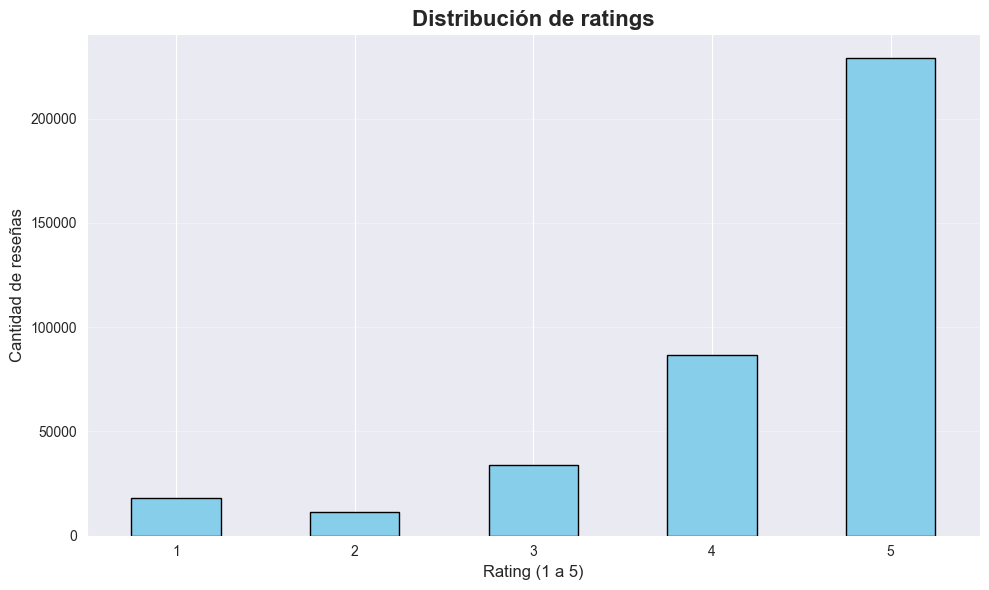

In [8]:
# 5.1. Análisis del dataset de reseñas – Distribución de ratings
import matplotlib.pyplot as plt

# Contar cuántas reseñas hay por cada calificación
conteo_ratings = df_reseñas['rating'].value_counts().sort_index()

print("Cantidad de reseñas por rating:")
print(conteo_ratings)

plt.figure(figsize=(10, 6))
conteo_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de ratings", fontsize=16, fontweight='bold')
plt.xlabel("Rating (1 a 5)", fontsize=12)
plt.ylabel("Cantidad de reseñas", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Número de reseñas por año:
año
2011        1
2012        4
2013       22
2014       14
2015       50
2016      351
2017     2652
2018    12879
2019    46837
2020    43305
2021    26933
2022    57020
2023    63533
2024    80423
2025    44945
Name: count, dtype: int64


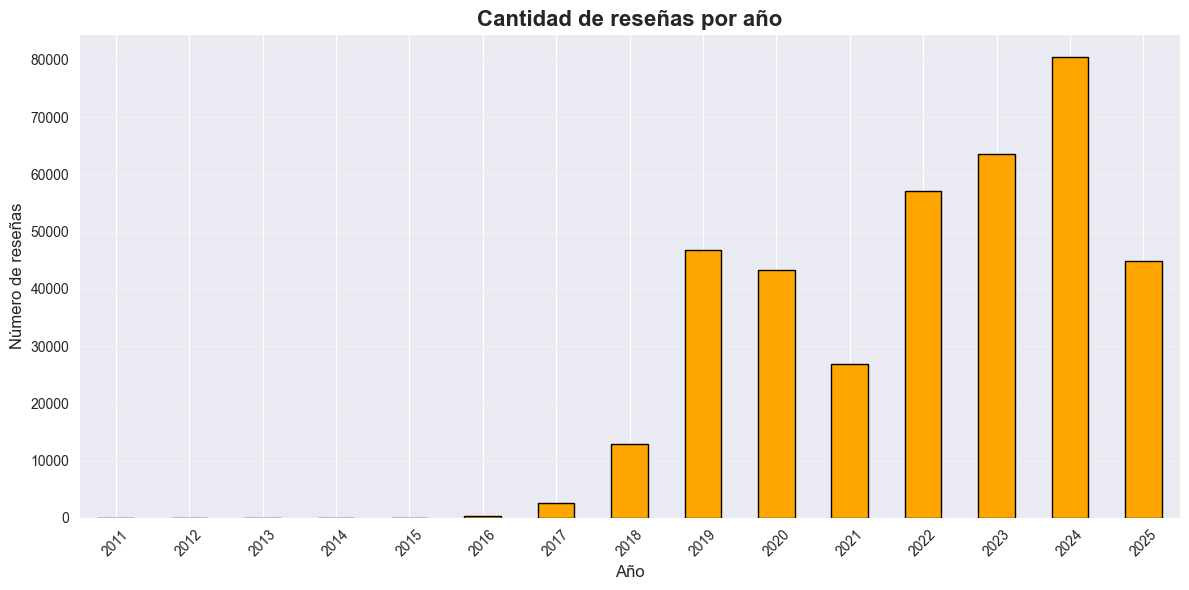

In [9]:
# 5.2. Análisis temporal – Reseñas por año
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que la columna de fechas esté en formato datetime
df_reseñas['review_date'] = pd.to_datetime(df_reseñas['review_date'], errors='coerce')

# Extraer el año
df_reseñas['año'] = df_reseñas['review_date'].dt.year

# Contar número de reseñas por año
reseñas_por_año = df_reseñas['año'].value_counts().sort_index()

# Mostrar conteo
print("Número de reseñas por año:")
print(reseñas_por_año)

# Gráfico
plt.figure(figsize=(12, 6))
reseñas_por_año.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Cantidad de reseñas por año", fontsize=16, fontweight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de reseñas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
# 5.3 Análisis del dataset de reseñas – longitud del comentario
import pandas as pd
import matplotlib.pyplot as plt

def conteo_palabras_seguro(x):
    if pd.isna(x):         # si es NaN
        return 0           # sin palabras
    # si quieres también tratar cadenas vacías/espacios:
    x = str(x).strip()
    if x == "":
        return 0
    return len(x.split())

# Recalcular
df_reseñas['caption_length'] = df_reseñas['caption'].apply(conteo_palabras_seguro)

# Revisar cuántos faltan realmente
print("Sin texto (0 palabras):", (df_reseñas['caption_length'] == 0).sum())

# Ver distribución (solo comentarios con texto)
conteo_palabras = df_reseñas.loc[df_reseñas['caption_length'] > 0, 'caption_length'] \
                             .value_counts().sort_index()
print("\n📊 Primeras 10 longitudes más comunes:")
print(conteo_palabras.head(10))


Sin texto (0 palabras): 178514

📊 Primeras 10 longitudes más comunes:
caption_length
1     11141
2     16636
3      9826
4     11601
5     11011
6     10548
7      9811
8      8486
9      7860
10     6973
Name: count, dtype: int64


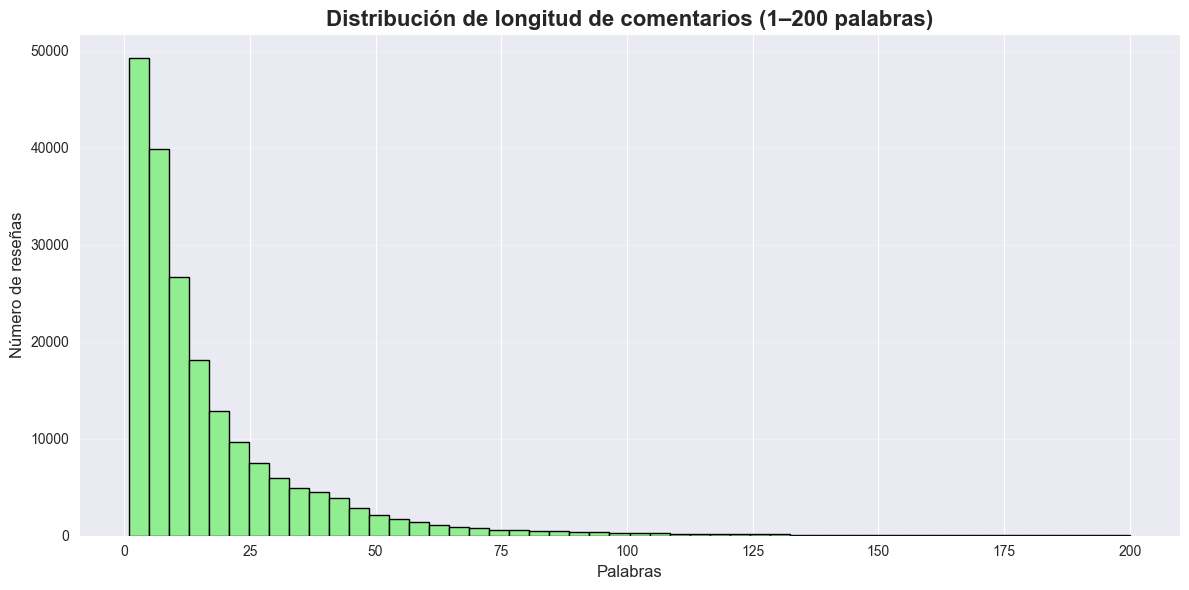

In [11]:
# Histograma enfocado en comentarios de 1-200 palabras
plt.figure(figsize=(12, 6))
df_reseñas.loc[df_reseñas['caption_length'].between(1, 200), 'caption_length'] \
          .hist(bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribución de longitud de comentarios (1–200 palabras)", fontsize=16, fontweight='bold')
plt.xlabel("Palabras", fontsize=12)
plt.ylabel("Número de reseñas", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [12]:
# Comentario más corto/largo con texto real
fila_min = df_reseñas.loc[df_reseñas['caption_length'] > 0] \
                      .loc[lambda d: d['caption_length'].idxmin()]
fila_max = df_reseñas.loc[df_reseñas['caption_length'].idxmax()]
print("\nMás corto (con texto):", fila_min['caption_length'], "palabras\n", fila_min['caption'])
print("\nMás largo:", fila_max['caption_length'], "palabras")



Más corto (con texto): 1 palabras
 Recomendable

Más largo: 811 palabras


In [13]:
# Estadísticas de longitud de comentarios
print("\n📈 Estadísticas de longitud de comentarios:")
print(df_reseñas['caption_length'].describe())



📈 Estadísticas de longitud de comentarios:
count    378969.000000
mean          9.545390
std          20.582405
min           0.000000
25%           0.000000
50%           1.000000
75%          11.000000
max         811.000000
Name: caption_length, dtype: float64


In [14]:
# Ejemplos de comentarios de 1 palabra
print("\n📝 Ejemplos de comentarios de 1 palabra:")
display(df_reseñas[df_reseñas['caption_length'] == 1][['caption', 'rating']].head(20))



📝 Ejemplos de comentarios de 1 palabra:


,caption,rating
14,Recomendable,4
144,Arriba,5
329,Excelente,5
338,Excelente,5
357,Rico,5
369,Excelente,5
394,Tradicional!!!,5
400,Excelente,5
434,Bien,5
502,Excelente,5


In [15]:
# Análisis detallado de longitudes
conteo_palabras = df_reseñas['caption_length'].value_counts().sort_index()
print("\n📊 Cantidad de comentarios por número de palabras (primeros 100):")
print(conteo_palabras.head(100))



📊 Cantidad de comentarios por número de palabras (primeros 100):
caption_length
0     178514
1      11141
2      16636
3       9826
4      11601
       ...  
95        74
96        83
97        89
98        76
99        66
Name: count, Length: 100, dtype: int64


In [16]:
# Comentario más corto - análisis detallado
min_len = df_reseñas['caption_length'].min()
fila_min = df_reseñas.loc[df_reseñas['caption_length'].idxmin()]
conteo_min = (df_reseñas['caption_length'] == min_len).sum()

print(f"Longitud mínima: {min_len} palabras")
print(f"Cantidad de comentarios con esa longitud: {conteo_min}\n")
print("Ejemplo de comentario más corto:")
print(f"Texto: {fila_min['caption']}")
print(f"Rating: {fila_min['rating']}")


Longitud mínima: 0 palabras
Cantidad de comentarios con esa longitud: 178514

Ejemplo de comentario más corto:
Texto: nan
Rating: 5


In [17]:
# Comentario más largo - análisis detallado
max_len = df_reseñas['caption_length'].max()
fila_max = df_reseñas.loc[df_reseñas['caption_length'].idxmax()]
conteo_max = (df_reseñas['caption_length'] == max_len).sum()

print(f"Longitud máxima: {max_len} palabras")
print(f"Cantidad de comentarios con esa longitud: {conteo_max}\n")
print("Ejemplo de comentario más largo:")
print("Texto:", fila_max['caption'][:500], "...")  # Primeros 500 caracteres
print(f"Rating: {fila_max['rating']}")


Longitud máxima: 811 palabras
Cantidad de comentarios con esa longitud: 1

Ejemplo de comentario más largo:
Texto: CONAMU  cocina coreana  Nuestras caracteristicas  ★ DOSIRAK (도시락) ★  (Varios alimentos cocinados, divididos en compartimentos en una bandeja) • Dosirak Especial (도시락 스페셜) - S/. Arroz blanco, chuleta de cerdo frita (Donkasu), fideos fritos (Chapche), rosbif (Bulgogui), rollito de algas (Kimbab), rollito de huevo coreano (KeranMari), nuggets de pollo con miel (Pollo Dulce) • Dosirak de panza de cerdo (삼겹살 도시락) - S/. Arroz blanco, panceta de cerdo a la parrilla (Samgyupsal), fideos fritos (Chapche) ...
Rating: 5


⚠️ WordCloud no está instalado. Mostrando análisis de frecuencia alternativo...


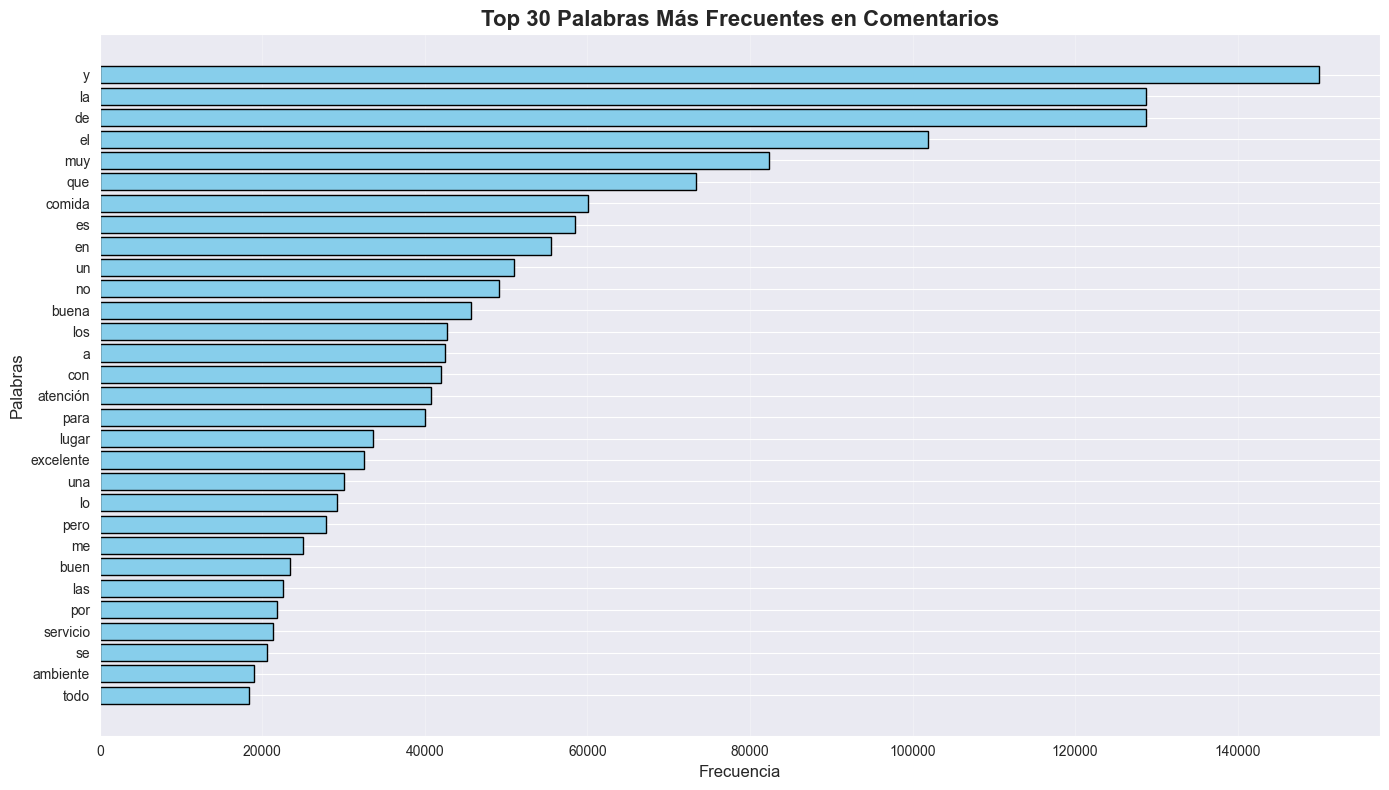

✅ Análisis de frecuencia completado: 51585 palabras únicas


In [18]:
# Nube de palabras para ver términos frecuentes (OPCIONAL)
# Nota: Si wordcloud no está instalado, esta celda se saltará
try:
    from wordcloud import WordCloud

    text = " ".join(df_reseñas['caption'].dropna())
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(15, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Nube de palabras - Comentarios de reseñas", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print("✅ Nube de palabras generada correctamente")
except ImportError:
    print("⚠️ WordCloud no está instalado. Mostrando análisis de frecuencia alternativo...")

    # Alternativa: Análisis de frecuencia de palabras con gráfico de barras
    from collections import Counter
    import re

    # Extraer todas las palabras
    all_text = " ".join(df_reseñas['caption'].dropna().astype(str))
    words = re.findall(r'\b[a-záéíóúñ]+\b', all_text.lower())

    # Contar frecuencias
    word_freq = Counter(words)

    # Top 30 palabras más comunes
    top_words = dict(word_freq.most_common(30))

    # Visualizar
    plt.figure(figsize=(14, 8))
    plt.barh(list(top_words.keys())[::-1], list(top_words.values())[::-1], color='skyblue', edgecolor='black')
    plt.xlabel('Frecuencia', fontsize=12)
    plt.ylabel('Palabras', fontsize=12)
    plt.title('Top 30 Palabras Más Frecuentes en Comentarios', fontsize=16, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"✅ Análisis de frecuencia completado: {len(word_freq)} palabras únicas")
except Exception as e:
    print(f"⚠️ Error al generar visualización de palabras: {e}")
    print("Continuando con el análisis...")


In [19]:
# ==========================================
# EDA DEL DATASET RESTAURANTES
# ==========================================


In [94]:
# 1.1 Obtener un resumen del DataFrame Restaurantes
print("=" * 60)
print("INFORMACIÓN DEL DATASET DE RESTAURANTES")
print("=" * 60)
df_restaurantes.info()


INFORMACIÓN DEL DATASET DE RESTAURANTES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_place             1055 non-null   object 
 1   url_place            1055 non-null   object 
 2   title                1055 non-null   object 
 3   category             1055 non-null   object 
 4   address              1054 non-null   object 
 5   phoneNumber          916 non-null    object 
 6   completePhoneNumber  916 non-null    object 
 7   domain               542 non-null    object 
 8   url                  542 non-null    object 
 9   stars                1018 non-null   float64
 10  reviews              1052 non-null   float64
 11  district             1055 non-null   object 
 12  lat                  1055 non-null   float64
 13  long                 1055 non-null   float64
dtypes: float64(4), object(10)
memory usage: 115.5+ K

In [20]:
# 1.2 Obtener un resumen estadístico de las columnas numéricas
df_restaurantes.describe()


,stars,reviews,lat,long
count,1018.000000,1052.000000,1055.000000,1055.000000
mean,4.258153,909.429658,-12.043841,-77.021997
std,0.443967,1752.584416,1.244685,0.152197
min,1.000000,0.000000,-12.168119,-77.076196
25%,4.100000,46.000000,-12.124210,-77.037157
50%,4.300000,271.500000,-12.110455,-77.030311
75%,4.500000,1089.250000,-12.091006,-77.020524
max,5.000000,22080.000000,11.265184,-74.190239


In [21]:
# 1.3 Resumen estadístico completo
df_restaurantes.describe(include='all')


,id_place,url_place,title,category,address,phoneNumber,completePhoneNumber,domain,url,stars,reviews,district,lat,long
count,1055,1055,1055,1055,1054,916,916,542,542,1018.000000,1052.000000,1055,1055.000000,1055.000000
unique,1055,1055,1034,89,1030,876,876,345,500,NaN,NaN,7,NaN,NaN
top,ChIJ41RbR-W3BZERtC40lE27kJI,https://www.google.com/maps/place/?q=place_id:...,Rustica,Restaurante,"Mercado de Magdalena, Magdalena del Mar 15086",(01) 6807070,+51 1 6807070,www.facebook.com,http://www.villachicken.com.pe/,NaN,NaN,Miraflores,NaN,NaN
freq,1,1,4,535,3,4,4,74,4,NaN,NaN,185,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.258153,909.429658,NaN,-12.043841,-77.021997
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.443967,1752.584416,NaN,1.244685,0.152197
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,-12.168119,-77.076196
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.100000,46.000000,NaN,-12.124210,-77.037157
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,271.500000,NaN,-12.110455,-77.030311
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,1089.250000,NaN,-12.091006,-77.020524


In [22]:
# 1.4 Verificar cuántos valores únicos hay en cada columna
print("\n📊 Valores únicos por columna:")
print(df_restaurantes.nunique())



📊 Valores únicos por columna:
id_place               1055
url_place              1055
title                  1034
category                 89
address                1030
phoneNumber             876
completePhoneNumber     876
domain                  345
url                     500
stars                    27
reviews                 663
district                  7
lat                    1036
long                   1040
dtype: int64


In [23]:
# 1.5 Verificar cuántos valores nulos hay en cada columna
print("\n🔍 Valores nulos por columna:")
print(df_restaurantes.isnull().sum())



🔍 Valores nulos por columna:
id_place                 0
url_place                0
title                    0
category                 0
address                  1
phoneNumber            139
completePhoneNumber    139
domain                 513
url                    513
stars                   37
reviews                  3
district                 0
lat                      0
long                     0
dtype: int64


In [24]:
# Mostrar primeras filas
print("\n📋 Primeras filas del dataset de restaurantes:")
display(df_restaurantes.head())



📋 Primeras filas del dataset de restaurantes:


,id_place,url_place,title,category,address,phoneNumber,completePhoneNumber,domain,url,stars,reviews,district,lat,long
0,ChIJ41RbR-W3BZERtC40lE27kJI,https://www.google.com/maps/place/?q=place_id:...,La 73,Restaurante,"Av. el Sol 175, Barranco 15063",(01) 2470780,+51 1 2470780,instagram.com,https://instagram.com/la73_barranco?utm_medium...,4.4,1741.0,Barranco,-12.139661,-77.023216
1,ChIJq6DzbfK3BZERzmnElUR7PUM,https://www.google.com/maps/place/?q=place_id:...,Pan Sal Aire,Restaurante,"Av. Almte. Miguel Grau 320, , Lima, Barranco 1...",951 118 993,+51 951 118 993,delivery.pansalaire.pe,https://delivery.pansalaire.pe/,4.6,2229.0,Barranco,-12.148280,-77.021087
2,ChIJQwRnc-23BZERpyhQvLJVMTQ,https://www.google.com/maps/place/?q=place_id:...,Restaurante Javier,Restaurante peruano,"Bajada de Baños 408, Barranco 15063",984 799 808,+51 984 799 808,www.restaurantejavier.pe,https://www.restaurantejavier.pe/,4.3,6810.0,Barranco,-12.149831,-77.023228
3,ChIJbYWvNb63BZER3Mb9WXTrobo,https://www.google.com/maps/place/?q=place_id:...,Nuestro Bistro,Restaurante,"Jr. Colina 107, Barranco 15063",948 721 346,+51 948 721 346,www.instagram.com,https://www.instagram.com/nuestro_bistro/,4.9,122.0,Barranco,-12.145981,-77.022046
4,ChIJQWG-5e63BZERioL90gT0vZ8,https://www.google.com/maps/place/?q=place_id:...,Cala Restaurante & Lounge,Restaurante,"Circuito de Playas, Barranco 15063",998 247 326,+51 998 247 326,NaN,NaN,4.4,8900.0,Barranco,-12.144648,-77.025753


In [ ]:
# ==========================================
# DATA WRANGLING - DATASET RESEÑAS
# ==========================================


In [25]:
# Obtener el número de filas y columnas
num_filas, num_columnas = df_reseñas.shape
print(f"📊 El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")


📊 El DataFrame tiene 378969 filas y 13 columnas.


In [26]:
# Verificar si hay valores duplicados en id_review
duplicados = df_reseñas["id_review"].duplicated().sum()
print(f"🔹 Cantidad de id_review duplicados: {duplicados}")

# Mostrar ejemplos de duplicados (si existen)
if duplicados > 0:
    print("\n⚠️ Ejemplos de id_review duplicados:")
    display(df_reseñas[df_reseñas["id_review"].duplicated(keep=False)].head(10))
else:
    print("✅ No se encontraron id_review duplicados.")


🔹 Cantidad de id_review duplicados: 2

⚠️ Ejemplos de id_review duplicados:


,id_review,caption,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place,id_place,año,caption_length
110815,ChZDSUhNMG9nS0VJQ0FnSURiMlBPTENnEAE,NaN,Hace un año,2024-08-10 13:04:33.096662,2025-08-10 13:04:33.096662,4,Andrea Massimo De Angelis,358,https://www.google.com/maps/contrib/1141919495...,https://www.google.com/maps/place/?q=place_id:...,ChIJI4lbum_JBZERIF6xd8TEoSI,2024,0
110816,ChZDSUhNMG9nS0VJQ0FnSURiMlBPTENnEAE,NaN,Hace un año,2024-08-10 13:04:37.835505,2025-08-10 13:04:37.835505,4,Andrea Massimo De Angelis,358,https://www.google.com/maps/contrib/1141919495...,https://www.google.com/maps/place/?q=place_id:...,ChIJI4lbum_JBZERIF6xd8TEoSI,2024,0
210175,ChZDSUhNMG9nS0VJQ0FnSURkM3BIUll3EAE,NaN,Hace un año,2024-08-12 12:08:59.169695,2025-08-12 12:08:59.169695,5,Carlos Vera,163,https://www.google.com/maps/contrib/1162493367...,https://www.google.com/maps/place/?q=place_id:...,ChIJZ3atyZTJBZERUAvEUlw1lL8,2024,0
210176,ChZDSUhNMG9nS0VJQ0FnSURkM3BIUll3EAE,NaN,Hace un año,2024-08-12 12:09:07.165625,2025-08-12 12:09:07.165625,5,Carlos Vera,163,https://www.google.com/maps/contrib/1162493367...,https://www.google.com/maps/place/?q=place_id:...,ChIJZ3atyZTJBZERUAvEUlw1lL8,2024,0


In [27]:
# Eliminar duplicados (manteniendo la primera aparición)
df_reseñas = df_reseñas.drop_duplicates(subset=["id_review"], keep="first").reset_index(drop=True)
print(f"✅ Duplicados eliminados. Total de registros ahora: {len(df_reseñas)}")


✅ Duplicados eliminados. Total de registros ahora: 378967


In [28]:
# Contar cuántos captions vacíos o nulos hay
print("🔍 Análisis de captions vacíos:")
print(f"Vacíos (NaN): {df_reseñas['caption'].isna().sum()}")
print(f"En blanco: {(df_reseñas['caption'].str.strip() == '').sum()}")


🔍 Análisis de captions vacíos:
Vacíos (NaN): 178512
En blanco: 0


In [29]:
# Mostrar ejemplos de captions vacíos
print("\n📋 Ejemplos de captions vacíos o nulos:")
display(df_reseñas.loc[
    df_reseñas['caption'].isna() | (df_reseñas['caption'].str.strip() == ""),
    ['id_review', 'username', 'rating', 'caption', 'review_date', 'id_place']
].head(20))



📋 Ejemplos de captions vacíos o nulos:


,id_review,username,rating,caption,review_date,id_place
0,ChZDSUhNMG9nS0VJQ0FnSUNVLV9HNEJ3EAE,Eduardo Rentería,5,NaN,2019-08-14 02:55:32.748162,ChIJ--Rcshq4BZERPIDegz6p5-o
1,ChZDSUhNMG9nS0VJQ0FnSURrb2FUZk5REAE,Margot Menacho,5,NaN,2019-08-14 02:55:32.748573,ChIJ--Rcshq4BZERPIDegz6p5-o
2,ChdDSUhNMG9nS0VJQ0FnSUNFdEtlbW93RRAB,Johrdan Davila Ruiz,5,NaN,2019-08-14 02:55:32.749164,ChIJ--Rcshq4BZERPIDegz6p5-o
5,ChZDSUhNMG9nS0VJQ0FnSURZa3NySFRnEAE,Luis Enrique Yanac Jimenez,4,NaN,2019-08-14 02:55:32.750748,ChIJ--Rcshq4BZERPIDegz6p5-o
7,ChZDSUhNMG9nS0VJQ0FnSUNvblpQeWZBEAE,Lizet Paola Bustamante,5,NaN,2019-08-14 02:55:32.751473,ChIJ--Rcshq4BZERPIDegz6p5-o
8,ChdDSUhNMG9nS0VJQ0FnSUNvM0ppUDRRRRAB,Carlos Palomino,5,NaN,2019-08-14 02:55:32.752028,ChIJ--Rcshq4BZERPIDegz6p5-o
17,ChZDSUhNMG9nS0VJQ0FnSUNLcHZPVmNREAE,enrique ramos vargas,5,NaN,2021-08-13 02:55:28.548130,ChIJ--Rcshq4BZERPIDegz6p5-o
18,ChZDSUhNMG9nS0VJQ0FnSUR5Z09LbFpBEAE,Nelly Catiri,5,NaN,2021-08-13 02:55:28.548505,ChIJ--Rcshq4BZERPIDegz6p5-o
19,ChdDSUhNMG9nS0VJQ0FnSUN5eU9PbG1RRRAB,stefani daal,5,NaN,2021-08-13 02:55:28.548923,ChIJ--Rcshq4BZERPIDegz6p5-o
23,ChZDSUhNMG9nS0VJQ0FnSUNtOHRDMUZBEAE,soledad rossanna ravello arbulú,3,NaN,2022-08-13 02:55:24.383647,ChIJ--Rcshq4BZERPIDegz6p5-o


In [30]:
# ELIMINAR CAMPOS VACIOS Y NULLS CON RESPECTO AL CAMPO 'caption'
df_reseñas.dropna(subset=['caption'], inplace=True)
df_reseñas.reset_index(drop=True, inplace=True)
print(f"✅ Comentarios vacíos/nulos eliminados. Total actual: {len(df_reseñas)}")


✅ Comentarios vacíos/nulos eliminados. Total actual: 200455


In [31]:
# Verificar el resultado
print("\n📋 Primeras filas después de limpiar:")
display(df_reseñas.head())



📋 Primeras filas después de limpiar:


,id_review,caption,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place,id_place,año,caption_length
0,ChdDSUhNMG9nS0VJQ0FnSUNFNE5PYV9BRRAB,"Sirven menú variado de lunes a viernes, en bas...",Hace 6 años,2019-08-14 02:55:32.749667,2025-08-12 02:55:32.749667,3,Luis Anticona,31,https://www.google.com/maps/contrib/1029463912...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,32
1,ChZDSUhNMG9nS0VJQ0FnSURZNzV6akRREAE,Todo muy rico peeo caro,Hace 6 años,2019-08-14 02:55:32.750200,2025-08-12 02:55:32.750200,4,Adrian Rebaza,67,https://www.google.com/maps/contrib/1063973783...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,5
2,ChZDSUhNMG9nS0VJQ0FnSURvdjctSkRBEAE,buena comida,Hace 6 años,2019-08-14 02:55:32.751110,2025-08-12 02:55:32.751110,4,Gabriela Peceros Ripa,0,https://www.google.com/maps/contrib/1168733588...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,2
3,ChdDSUhNMG9nS0VJQ0FnSURzc3ViMDBnRRAB,La atención es muy lenta pero es rico.,Hace 5 años,2020-08-13 02:55:28.549590,2025-08-12 02:55:28.549590,3,Mila gutiérrez vásquez,12,https://www.google.com/maps/contrib/1065567613...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,8
4,ChdDSUhNMG9nS0VJQ0FnSURzbEphMV9BRRAB,Buenísimo... 5000% recomendable...,Hace 5 años,2020-08-13 02:55:28.549921,2025-08-12 02:55:28.549921,5,O Z,0,https://www.google.com/maps/contrib/1085966709...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,3


In [32]:
# Detectar caracteres especiales en los comentarios
import re
from collections import Counter

# Patrón: detecta todo lo que NO sea letra (con o sin tilde), número, espacio o signos comunes
patron_especial = re.compile(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]")

# Extraer todos los caracteres especiales de los comentarios
caracteres_encontrados = df_reseñas["caption"].dropna().apply(lambda x: patron_especial.findall(str(x)))

# Aplanar la lista de listas
todos_caracteres = [c for sublist in caracteres_encontrados for c in sublist]

# Contar frecuencia de cada carácter especial
contador_caracteres = Counter(todos_caracteres)

# Convertir a DataFrame para visualizar mejor
df_caracteres = pd.DataFrame(contador_caracteres.most_common(), columns=["caracter", "frecuencia"])

# Mostrar los 30 más comunes
print("🔍 Caracteres especiales encontrados en los comentarios:")
display(df_caracteres.head(30))

print(f"\n🔹 Total de caracteres especiales distintos: {len(df_caracteres)}")
print(f"🔹 Total de ocurrencias de caracteres especiales: {sum(contador_caracteres.values())}")


🔍 Caracteres especiales encontrados en los comentarios:


,caracter,frecuencia
0,.,263786
1,",",201538
2,!,52586
3,0,20366
4,1,16736
5,…,11123
6,¡,10736
7,),8508
8,2,8071
9,(,7778



🔹 Total de caracteres especiales distintos: 964
🔹 Total de ocurrencias de caracteres especiales: 680622


In [33]:
# Eliminar solo los caracteres especiales del texto, sin borrar el comentario
df_reseñas["caption_limpio"] = df_reseñas["caption"].astype(str).apply(
    lambda x: patron_especial.sub("", x)
)

# Mostrar comparación antes/después
print("🧹 Ejemplos antes y después de limpiar:")
display(df_reseñas[["caption", "caption_limpio"]].sample(10, random_state=42))


🧹 Ejemplos antes y después de limpiar:


,caption,caption_limpio
56751,"El sitio y el servicio son muy buenos, tuve la...",El sitio y el servicio son muy buenos tuve la ...
163096,Como siempre genial,Como siempre genial
62557,"Excelente servicio y muy buena comida, sin dud...",Excelente servicio y muy buena comida sin duda...
51127,Muy agradable,Muy agradable
78833,Unas sopas buenasas,Unas sopas buenasas
105247,"Excelente lugar, variado muy bueno.",Excelente lugar variado muy bueno
93169,Un referente en Perú para los sánguches. Trato...,Un referente en Perú para los sánguches Trato ...
174159,"Todo excelente, lo recomiendo",Todo excelente lo recomiendo
163450,"Linda atención, mucha variedad",Linda atención mucha variedad
194549,Mala comida y pésima atención.,Mala comida y pésima atención


In [34]:
# Reemplazar caption original con el limpio
df_reseñas["caption"] = df_reseñas["caption_limpio"]
df_reseñas.drop(columns=["caption_limpio"], inplace=True)

# Renombrar 'caption' a 'comment'
df_reseñas.rename(columns={"caption": "comment"}, inplace=True)
print("✅ Se reemplazó el texto original y se renombró a 'comment'.")


✅ Se reemplazó el texto original y se renombró a 'comment'.


In [35]:
# Verificar resultado
display(df_reseñas.head())


,id_review,comment,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place,id_place,año,caption_length
0,ChdDSUhNMG9nS0VJQ0FnSUNFNE5PYV9BRRAB,Sirven menú variado de lunes a viernes en base...,Hace 6 años,2019-08-14 02:55:32.749667,2025-08-12 02:55:32.749667,3,Luis Anticona,31,https://www.google.com/maps/contrib/1029463912...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,32
1,ChZDSUhNMG9nS0VJQ0FnSURZNzV6akRREAE,Todo muy rico peeo caro,Hace 6 años,2019-08-14 02:55:32.750200,2025-08-12 02:55:32.750200,4,Adrian Rebaza,67,https://www.google.com/maps/contrib/1063973783...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,5
2,ChZDSUhNMG9nS0VJQ0FnSURvdjctSkRBEAE,buena comida,Hace 6 años,2019-08-14 02:55:32.751110,2025-08-12 02:55:32.751110,4,Gabriela Peceros Ripa,0,https://www.google.com/maps/contrib/1168733588...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,2
3,ChdDSUhNMG9nS0VJQ0FnSURzc3ViMDBnRRAB,La atención es muy lenta pero es rico,Hace 5 años,2020-08-13 02:55:28.549590,2025-08-12 02:55:28.549590,3,Mila gutiérrez vásquez,12,https://www.google.com/maps/contrib/1065567613...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,8
4,ChdDSUhNMG9nS0VJQ0FnSURzbEphMV9BRRAB,Buenísimo recomendable,Hace 5 años,2020-08-13 02:55:28.549921,2025-08-12 02:55:28.549921,5,O Z,0,https://www.google.com/maps/contrib/1085966709...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,3


In [36]:
# Convertir todo a minúsculas
df_reseñas["comment"] = df_reseñas["comment"].str.lower()
print("✅ Comentarios convertidos a minúsculas.")


✅ Comentarios convertidos a minúsculas.


In [37]:
# Paso 5: Verificar de nuevo si hay campos en blanco en comment
num_filas, num_columnas = df_reseñas.shape
print(f"📊 El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

# Validando cuantos comments vacíos o nulos hay
print(f"\n🔍 Validación de comments:")
print(f"Vacíos: {df_reseñas['comment'].isna().sum()}")
print(f"En blanco: {(df_reseñas['comment'].str.strip() == '').sum()}")


📊 El DataFrame tiene 200455 filas y 13 columnas.

🔍 Validación de comments:
Vacíos: 0
En blanco: 548


In [38]:
# Eliminar filas donde 'comment' está vacío o tiene solo espacios
df_reseñas = df_reseñas[df_reseñas['comment'].str.strip() != ""]
df_reseñas.reset_index(drop=True, inplace=True)

print("✅ Filas con comentarios en blanco eliminadas.")
print(f"📊 Total actual de registros: {len(df_reseñas)}")
print(f"🔍 Vacíos: {(df_reseñas['comment'].str.strip() == '').sum()}")


✅ Filas con comentarios en blanco eliminadas.
📊 Total actual de registros: 199907
🔍 Vacíos: 0


In [47]:
# ==========================================
# Paso 6: IDENTIFICACIÓN Y ELIMINACIÓN DE STOPWORDS
# ==========================================


In [39]:
# 6.1 Identificación de comentarios compuestos solo por stopwords
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Descargar lista de stopwords en español (solo primera vez)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Cargar stopwords base de NLTK
stop_words = set(stopwords.words('spanish'))

def es_solo_stopwords(texto):
    """Retorna True si el comentario contiene solo stopwords."""
    palabras = texto.split()
    if not palabras:
        return False
    return all(p in stop_words for p in palabras)

# Aplicar la detección
df_reseñas["solo_stopwords"] = df_reseñas["comment"].apply(es_solo_stopwords)
solo_stop = df_reseñas[df_reseñas["solo_stopwords"]].copy()

print(f"✅ Total de comentarios formados solo por stopwords: {len(solo_stop)}")
display(solo_stop[["id_review", "username", "comment"]].head(15))


✅ Total de comentarios formados solo por stopwords: 228


,id_review,username,comment
4257,ChRDSUhNMG9nS0VJQ0FnSUNNcHBnURAB,Juan Bustos,de
4418,ChZDSUhNMG9nS0VJQ0FnSUQ0bGV5NURnEAE,Kamilla Arteta,lo
4563,ChZDSUhNMG9nS0VJQ0FnSURqNC1PakF3EAE,cristian Leonel,muy poco
5105,ChZDSUhNMG9nS0VJQ0FnSURyMTdDblJREAE,Gary Madu,hasta
6626,ChZDSUhNMG9nS0VJQ0FnSUQtcVlLWkl3EAE,Violeta Da Silva,a
7750,ChZDSUhNMG9nS0VJQ0FnSUNncmREQ1lBEAE,Diego Martin Perez,es lo que hay
7890,ChZDSUhNMG9nS0VJQ0FnSUQ5cDRUSkR3EAE,Sandro Delgado Vasquez,a
8270,ChdDSUhNMG9nS0VJQ0FnSUNZdWF6SC13RRAB,Javicho Reyes,lo
8740,ChZDSUhNMG9nS0VJQ0FnSUQyMUoyV0lREAE,Edison Malca,el
9681,ChdDSUhNMG9nS0VJQ0FnSUNwZ1lTM3ZnRRAB,Yohana Rafael (Yoa),todo muy


In [40]:
# 6.2 Análisis de frecuencia de las stopwords detectadas
texto_todo = " ".join(solo_stop["comment"].astype(str))
palabras = texto_todo.lower().split()

contador = Counter(palabras)
df_freq_stop = pd.DataFrame(contador.most_common(), columns=["stopword", "frecuencia"])

print("🔍 Stopwords detectadas y su frecuencia:")
display(df_freq_stop)

print(f"\n🔸 Stopwords distintas: {len(df_freq_stop)}")
print(f"🔹 Total ocurrencias: {df_freq_stop['frecuencia'].sum()}")


🔍 Stopwords detectadas y su frecuencia:


,stopword,frecuencia
0,a,64
1,todo,51
2,de,48
3,no,33
4,es,26
5,ya,22
6,lo,20
7,antes,17
8,como,17
9,en,14



🔸 Stopwords distintas: 50
🔹 Total ocurrencias: 460


In [41]:
# 6.3 Clasificación de stopwords (significativas vs sin significado)
stopwords_significativas = {
    "no","ni","nada","muy","poco","mucho","más","algo","ya","antes",
    "hasta","todo","todos","como","es","era","está","fue","estuvo",
    "tiene","tenían","tienes","tuve","hay","soy","estamos",
    "para","sí"
}

df_freq_stop["mantener"] = df_freq_stop["stopword"].apply(lambda x: x in stopwords_significativas)
print("\n📊 Clasificación de stopwords:")
display(df_freq_stop)



📊 Clasificación de stopwords:


,stopword,frecuencia,mantener
0,a,64,False
1,todo,51,True
2,de,48,False
3,no,33,True
4,es,26,True
5,ya,22,True
6,lo,20,False
7,antes,17,True
8,como,17,True
9,en,14,False


In [42]:
# 6.4 Definición de listas personalizadas y detección de comentarios sin significado
# Stopwords sin valor semántico (las que se eliminarán si están solas)
stopwords_sin_significado = stop_words - stopwords_significativas

def solo_stop_sin_significado(texto):
    """Retorna True si el comentario está formado solo por stopwords sin significado."""
    palabras = texto.split()
    if not palabras:
        return False
    return all(p in stopwords_sin_significado for p in palabras)

# Aplicar al DataFrame
df_reseñas["solo_stop_sin_significado"] = df_reseñas["comment"].apply(solo_stop_sin_significado)
total_eliminar = df_reseñas["solo_stop_sin_significado"].sum()
print(f"🔹 Comentarios solo con stopwords sin significado: {total_eliminar}")


🔹 Comentarios solo con stopwords sin significado: 86


In [43]:
# 6.5. Visualización de ejemplos de comentarios sin significado
solo_sin_significado = df_reseñas[df_reseñas["solo_stop_sin_significado"]]
print("\n📋 Ejemplos de comentarios sin significado:")
display(solo_sin_significado[["id_review", "username", "comment"]].head(20))



📋 Ejemplos de comentarios sin significado:


,id_review,username,comment
4257,ChRDSUhNMG9nS0VJQ0FnSUNNcHBnURAB,Juan Bustos,de
4418,ChZDSUhNMG9nS0VJQ0FnSUQ0bGV5NURnEAE,Kamilla Arteta,lo
6626,ChZDSUhNMG9nS0VJQ0FnSUQtcVlLWkl3EAE,Violeta Da Silva,a
7890,ChZDSUhNMG9nS0VJQ0FnSUQ5cDRUSkR3EAE,Sandro Delgado Vasquez,a
8270,ChdDSUhNMG9nS0VJQ0FnSUNZdWF6SC13RRAB,Javicho Reyes,lo
8740,ChZDSUhNMG9nS0VJQ0FnSUQyMUoyV0lREAE,Edison Malca,el
9756,ChZDSUhNMG9nS0VJQ0FnSUNydjZUOWFREAE,ELMER ILLAN COCHACHIN,de
11595,ChdDSUhNMG9nS0VJQ0FnSURta3FuVzJRRRAB,danitza zapata,de
12025,ChdDSUhNMG9nS0VJQ0FnSUN4MDQyczF3RRAB,Andy Narva Gacon,de
19105,ChdDSUhNMG9nS0VJQ0FnSUMyaWFEcWx3RRAB,Juan Luis Vidal Reyes,a


In [44]:
# 6.6 Eliminación de comentarios sin significado
df_reseñas = df_reseñas[~df_reseñas["solo_stop_sin_significado"]].reset_index(drop=True)
df_reseñas.drop(columns=["solo_stop_sin_significado"], inplace=True, errors="ignore")
print(f"✅ Comentarios sin significado eliminados. Total actual: {len(df_reseñas)} registros.")


✅ Comentarios sin significado eliminados. Total actual: 199821 registros.


In [45]:
# 6.7 Verificación post-proceso
# Volver a comprobar si quedan comentarios formados solo por stopwords
df_reseñas["solo_stopwords"] = df_reseñas["comment"].apply(es_solo_stopwords)
restantes = df_reseñas["solo_stopwords"].sum()

if restantes == 0:
    print("✅ No quedan comentarios formados solo por stopwords.")
else:
    print(f"⚠️ Aún quedan {restantes} comentarios con solo stopwords.")
    display(df_reseñas[df_reseñas["solo_stopwords"]][["id_review", "username", "comment"]].head(10))

# Eliminar columna temporal
df_reseñas.drop(columns=["solo_stopwords"], inplace=True, errors="ignore")


⚠️ Aún quedan 142 comentarios con solo stopwords.


,id_review,username,comment
4561,ChZDSUhNMG9nS0VJQ0FnSURqNC1PakF3EAE,cristian Leonel,muy poco
5103,ChZDSUhNMG9nS0VJQ0FnSURyMTdDblJREAE,Gary Madu,hasta
7747,ChZDSUhNMG9nS0VJQ0FnSUNncmREQ1lBEAE,Diego Martin Perez,es lo que hay
9675,ChdDSUhNMG9nS0VJQ0FnSUNwZ1lTM3ZnRRAB,Yohana Rafael (Yoa),todo muy
9821,ChZDSUhNMG9nS0VJQ0FnTUNnbklPVWZBEAE,Melvin Fernández,estuvo en algo
10132,ChZDSUhNMG9nS0VJQ0FnSUMtd3ZiQU9BEAE,JUAN CARLOS ARRUNATEGUI RAMIREZ,ya no es el de antes
10203,ChdDSUhNMG9nS0VJQ0FnSUNsb19HZTRRRRAB,Santiago collantes urbina,se como
10524,ChdDSUhNMG9nS0VJQ0FnSUNCOHEzMGxnRRAB,Oscar Arriola,hasta
10668,ChdDSUhNMG9nS0VJQ0FnSURreTZDb2dBRRAB,Veronica Tristan,ya no es como antes
11954,ChZDSUhNMG9nS0VJQ0FnSUMyNnNMaEZBEAE,Dora Zandra Ugarte Ugarte,como


In [46]:
# 6.8 Resultado final del DataFrame limpio
num_filas, num_columnas = df_reseñas.shape
print(f"📊 El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

print("\n📋 DataFrame final:")
display(df_reseñas.head())


📊 El DataFrame tiene 199821 filas y 13 columnas.

📋 DataFrame final:


,id_review,comment,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place,id_place,año,caption_length
0,ChdDSUhNMG9nS0VJQ0FnSUNFNE5PYV9BRRAB,sirven menú variado de lunes a viernes en base...,Hace 6 años,2019-08-14 02:55:32.749667,2025-08-12 02:55:32.749667,3,Luis Anticona,31,https://www.google.com/maps/contrib/1029463912...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,32
1,ChZDSUhNMG9nS0VJQ0FnSURZNzV6akRREAE,todo muy rico peeo caro,Hace 6 años,2019-08-14 02:55:32.750200,2025-08-12 02:55:32.750200,4,Adrian Rebaza,67,https://www.google.com/maps/contrib/1063973783...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,5
2,ChZDSUhNMG9nS0VJQ0FnSURvdjctSkRBEAE,buena comida,Hace 6 años,2019-08-14 02:55:32.751110,2025-08-12 02:55:32.751110,4,Gabriela Peceros Ripa,0,https://www.google.com/maps/contrib/1168733588...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,2
3,ChdDSUhNMG9nS0VJQ0FnSURzc3ViMDBnRRAB,la atención es muy lenta pero es rico,Hace 5 años,2020-08-13 02:55:28.549590,2025-08-12 02:55:28.549590,3,Mila gutiérrez vásquez,12,https://www.google.com/maps/contrib/1065567613...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,8
4,ChdDSUhNMG9nS0VJQ0FnSURzbEphMV9BRRAB,buenísimo recomendable,Hace 5 años,2020-08-13 02:55:28.549921,2025-08-12 02:55:28.549921,5,O Z,0,https://www.google.com/maps/contrib/1085966709...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,3


In [ ]:
# ==========================================
# DATA WRANGLING - DATASET RESTAURANTES
# ==========================================


In [47]:
# Obtener el número de filas y columnas que tiene el dataset
num_filas, num_columnas = df_restaurantes.shape
print(f"📊 El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")


📊 El DataFrame tiene 1055 filas y 14 columnas.


In [48]:
# Verificar si hay campos vacíos o nulos en id_place
print("🔍 Validación de id_place:")
print(f"Vacíos: {df_restaurantes['id_place'].isna().sum()}")
print(f"En blanco: {(df_restaurantes['id_place'].str.strip() == '').sum()}")


🔍 Validación de id_place:
Vacíos: 0
En blanco: 0


In [49]:
# Mostrando el dataset restaurantes
print("\n📋 Dataset de restaurantes:")
display(df_restaurantes.head())



📋 Dataset de restaurantes:


,id_place,url_place,title,category,address,phoneNumber,completePhoneNumber,domain,url,stars,reviews,district,lat,long
0,ChIJ41RbR-W3BZERtC40lE27kJI,https://www.google.com/maps/place/?q=place_id:...,La 73,Restaurante,"Av. el Sol 175, Barranco 15063",(01) 2470780,+51 1 2470780,instagram.com,https://instagram.com/la73_barranco?utm_medium...,4.4,1741.0,Barranco,-12.139661,-77.023216
1,ChIJq6DzbfK3BZERzmnElUR7PUM,https://www.google.com/maps/place/?q=place_id:...,Pan Sal Aire,Restaurante,"Av. Almte. Miguel Grau 320, , Lima, Barranco 1...",951 118 993,+51 951 118 993,delivery.pansalaire.pe,https://delivery.pansalaire.pe/,4.6,2229.0,Barranco,-12.148280,-77.021087
2,ChIJQwRnc-23BZERpyhQvLJVMTQ,https://www.google.com/maps/place/?q=place_id:...,Restaurante Javier,Restaurante peruano,"Bajada de Baños 408, Barranco 15063",984 799 808,+51 984 799 808,www.restaurantejavier.pe,https://www.restaurantejavier.pe/,4.3,6810.0,Barranco,-12.149831,-77.023228
3,ChIJbYWvNb63BZER3Mb9WXTrobo,https://www.google.com/maps/place/?q=place_id:...,Nuestro Bistro,Restaurante,"Jr. Colina 107, Barranco 15063",948 721 346,+51 948 721 346,www.instagram.com,https://www.instagram.com/nuestro_bistro/,4.9,122.0,Barranco,-12.145981,-77.022046
4,ChIJQWG-5e63BZERioL90gT0vZ8,https://www.google.com/maps/place/?q=place_id:...,Cala Restaurante & Lounge,Restaurante,"Circuito de Playas, Barranco 15063",998 247 326,+51 998 247 326,NaN,NaN,4.4,8900.0,Barranco,-12.144648,-77.025753


In [ ]:
# ==========================================
# MERGED - DATASET COMPLETO
# ==========================================


In [50]:
# Concatenar los dos DataFrames usando la columna 'id_place'
# 💡 LEFT JOIN: Mantiene TODAS las reseñas (199,821), incluso sin metadata de restaurante
df_datafinal = pd.merge(df_reseñas, df_restaurantes, on='id_place', how='left')

print("✅ DataFrames unidos correctamente")
print("\n📋 Primeras filas del dataset final:")
display(df_datafinal.head())


✅ DataFrames unidos correctamente

📋 Primeras filas del dataset final:


,id_review,comment,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place_x,...,address,phoneNumber,completePhoneNumber,domain,url,stars,reviews,district,lat,long
0,ChdDSUhNMG9nS0VJQ0FnSUNFNE5PYV9BRRAB,sirven menú variado de lunes a viernes en base...,Hace 6 años,2019-08-14 02:55:32.749667,2025-08-12 02:55:32.749667,3,Luis Anticona,31,https://www.google.com/maps/contrib/1029463912...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662
1,ChZDSUhNMG9nS0VJQ0FnSURZNzV6akRREAE,todo muy rico peeo caro,Hace 6 años,2019-08-14 02:55:32.750200,2025-08-12 02:55:32.750200,4,Adrian Rebaza,67,https://www.google.com/maps/contrib/1063973783...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662
2,ChZDSUhNMG9nS0VJQ0FnSURvdjctSkRBEAE,buena comida,Hace 6 años,2019-08-14 02:55:32.751110,2025-08-12 02:55:32.751110,4,Gabriela Peceros Ripa,0,https://www.google.com/maps/contrib/1168733588...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662
3,ChdDSUhNMG9nS0VJQ0FnSURzc3ViMDBnRRAB,la atención es muy lenta pero es rico,Hace 5 años,2020-08-13 02:55:28.549590,2025-08-12 02:55:28.549590,3,Mila gutiérrez vásquez,12,https://www.google.com/maps/contrib/1065567613...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662
4,ChdDSUhNMG9nS0VJQ0FnSURzbEphMV9BRRAB,buenísimo recomendable,Hace 5 años,2020-08-13 02:55:28.549921,2025-08-12 02:55:28.549921,5,O Z,0,https://www.google.com/maps/contrib/1085966709...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662


In [51]:
# Obtener el número de filas y columnas que tiene el DATASET FINAL
num_filas, num_columnas = df_datafinal.shape
print(f"📊 El DataFrame Final tiene {num_filas} filas y {num_columnas} columnas.")


📊 El DataFrame Final tiene 199821 filas y 26 columnas.


In [52]:
# Selección de columnas relevantes para análisis de sentimientos
df_modelo = df_datafinal[[
    "id_review",
    "id_place",
    "comment",     # texto de la reseña
    "rating",      # etiqueta
    "username",    # nombre del usuario
    "review_date", # opcional: análisis temporal
    "title",       # nombre del restaurante
    "category",    # tipo de negocio
    "district"     # ubicación
]]

print("✅ Columnas relevantes seleccionadas para el modelo")
display(df_modelo.head())


✅ Columnas relevantes seleccionadas para el modelo


,id_review,id_place,comment,rating,username,review_date,title,category,district
0,ChdDSUhNMG9nS0VJQ0FnSUNFNE5PYV9BRRAB,ChIJ--Rcshq4BZERPIDegz6p5-o,sirven menú variado de lunes a viernes en base...,3,Luis Anticona,2019-08-14 02:55:32.749667,Restaurante Doña Gladys,Restaurante,Surco
1,ChZDSUhNMG9nS0VJQ0FnSURZNzV6akRREAE,ChIJ--Rcshq4BZERPIDegz6p5-o,todo muy rico peeo caro,4,Adrian Rebaza,2019-08-14 02:55:32.750200,Restaurante Doña Gladys,Restaurante,Surco
2,ChZDSUhNMG9nS0VJQ0FnSURvdjctSkRBEAE,ChIJ--Rcshq4BZERPIDegz6p5-o,buena comida,4,Gabriela Peceros Ripa,2019-08-14 02:55:32.751110,Restaurante Doña Gladys,Restaurante,Surco
3,ChdDSUhNMG9nS0VJQ0FnSURzc3ViMDBnRRAB,ChIJ--Rcshq4BZERPIDegz6p5-o,la atención es muy lenta pero es rico,3,Mila gutiérrez vásquez,2020-08-13 02:55:28.549590,Restaurante Doña Gladys,Restaurante,Surco
4,ChdDSUhNMG9nS0VJQ0FnSURzbEphMV9BRRAB,ChIJ--Rcshq4BZERPIDegz6p5-o,buenísimo recomendable,5,O Z,2020-08-13 02:55:28.549921,Restaurante Doña Gladys,Restaurante,Surco


In [53]:
# Dimensiones del dataset para modelado
num_filas, num_columnas = df_modelo.shape
print(f"📊 El DataFrame para modelado tiene {num_filas} filas y {num_columnas} columnas.")


📊 El DataFrame para modelado tiene 199821 filas y 9 columnas.


In [ ]:
# ==========================================
# ANÁLISIS DE DISTRIBUCIÓN DE RATINGS
# ==========================================


In [54]:
# CUANTOS RATINGS HAY
print("📊 Distribución de ratings:")
print(df_modelo["rating"].value_counts().sort_index())


📊 Distribución de ratings:
rating
1     12950
2      7356
3     17143
4     41483
5    120889
Name: count, dtype: int64


In [55]:
# Crear columna de sentimiento basada en rating
# Se trabajará con 3 clases (sentimiento)
def rating_to_sentiment(r):
    if r in [1, 2]:
        return "negativo"
    elif r == 3:
        return "neutro"
    else:
        return "positivo"

df_modelo["sentimiento"] = df_modelo["rating"].apply(rating_to_sentiment)

print("✅ Columna 'sentimiento' creada")
print("\n📊 Distribución de sentimientos:")
print(df_modelo["sentimiento"].value_counts())


✅ Columna 'sentimiento' creada

📊 Distribución de sentimientos:
sentimiento
positivo    162372
negativo     20306
neutro       17143
Name: count, dtype: int64


C:\Users\wilto\AppData\Local\Temp\ipykernel_27412\2734428562.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo["sentimiento"] = df_modelo["rating"].apply(rating_to_sentiment)


In [56]:
# EN PORCENTAJE CANTIDAD DE SENTIMIENTOS
print("📊 Distribución de sentimientos (%):")
sentimiento_pct = df_modelo["sentimiento"].value_counts(normalize=True) * 100
print(sentimiento_pct)


📊 Distribución de sentimientos (%):
sentimiento
positivo    81.258727
negativo    10.162095
neutro       8.579178
Name: proportion, dtype: float64


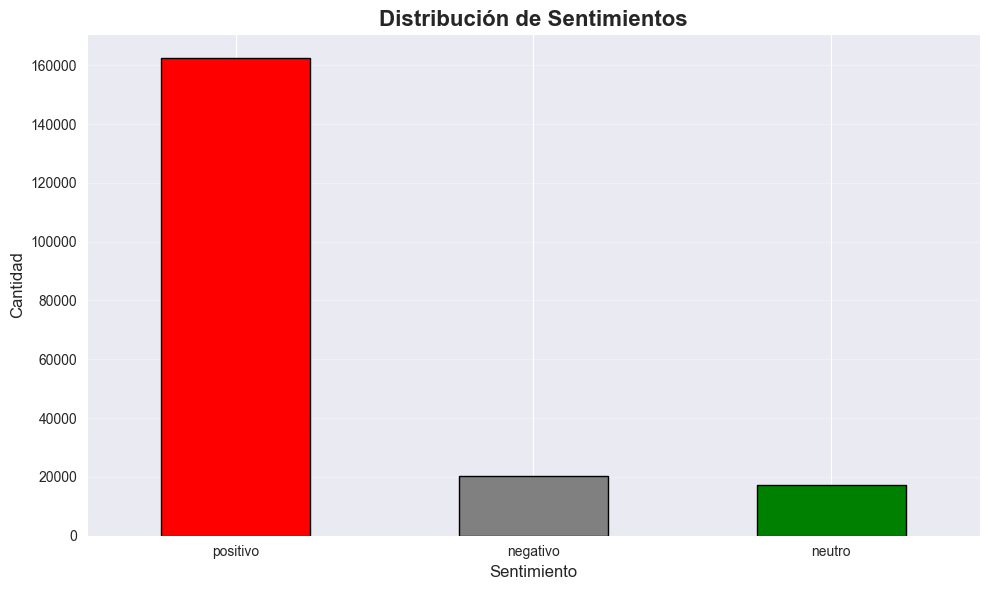

In [57]:
# Visualización de la distribución de sentimientos
plt.figure(figsize=(10, 6))
df_modelo["sentimiento"].value_counts().plot(kind='bar', color=['red', 'gray', 'green'], edgecolor='black')
plt.title("Distribución de Sentimientos", fontsize=16, fontweight='bold')
plt.xlabel("Sentimiento", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [69]:
# ==========================================
# GUARDAR DATASETS PROCESADOS
# ==========================================


In [115]:
# Guardar el dataset limpio para el modelo
output_path = DATA_PROCESSED / 'modelo_limpio.csv'
df_modelo.to_csv(output_path, index=False, encoding='utf-8')
print(f"✅ Dataset para modelado guardado en: {output_path}")
print(f"📊 Dimensiones finales: {df_modelo.shape[0]} filas x {df_modelo.shape[1]} columnas")


✅ Dataset para modelado guardado en: ..\data\processed\modelo_limpio.csv
📊 Dimensiones finales: 199821 filas x 10 columnas


In [117]:
# Resumen final
print("\n" + "="*60)
print("RESUMEN FINAL DEL PROCESAMIENTO")
print("="*60)
print(f"✅ Total de reseñas procesadas: {len(df_modelo):,}")
print(f"✅ Total de restaurantes: {df_modelo['id_place'].nunique():,}")
print(f"✅ Total de usuarios: {df_modelo['username'].nunique():,}")
print(f"\n📊 Distribución de sentimientos:")
print(f"   • Positivo: {(df_modelo['sentimiento'] == 'positivo').sum():,} ({sentimiento_pct['positivo']:.2f}%)")
print(f"   • Negativo: {(df_modelo['sentimiento'] == 'negativo').sum():,} ({sentimiento_pct['negativo']:.2f}%)")
print(f"   • Neutro: {(df_modelo['sentimiento'] == 'neutro').sum():,} ({sentimiento_pct['neutro']:.2f}%)")
print("\n🎯 Dataset listo para construcción del modelo con Redes Bayesianas (Naive Bayes)")
print("="*60)



RESUMEN FINAL DEL PROCESAMIENTO
✅ Total de reseñas procesadas: 199,821
✅ Total de restaurantes: 1,001
✅ Total de usuarios: 121,604

📊 Distribución de sentimientos:
   • Positivo: 162,372 (81.26%)
   • Negativo: 20,306 (10.16%)
   • Neutro: 17,143 (8.58%)

🎯 Dataset listo para construcción del modelo con Redes Bayesianas (Naive Bayes)


In [ ]:
# ==========================================
# EVALUACIÓN DEL MODELO - MATRIZ DE CONFUSIÓN
# ==========================================


In [118]:
# 🤖 CARGAR MODELO DE SENTIMIENTOS CORRECTAMENTE
import joblib
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("="*80)
print("🤖 CARGANDO MODELO DE SENTIMIENTOS")
print("="*80)

# Ruta al modelo
modelo_path = DATA_PROCESSED.parent / 'models' / 'sentiment_model.pkl'

print(f"\n📂 Cargando desde: {modelo_path}")

try:
    # Cargar con joblib (forma correcta)
    model_data = joblib.load(modelo_path)
    
    # Extraer componentes
    if isinstance(model_data, dict):
        vectorizer = model_data.get('vectorizer')
        classifier = model_data.get('classifier')
        metadata = model_data.get('metadata', {})
        
        print(f"✅ Modelo cargado exitosamente")
        print(f"   Tipo vectorizador: {type(vectorizer).__name__}")
        print(f"   Tipo clasificador: {type(classifier).__name__}")
        print(f"   Vocabulario: {len(vectorizer.vocabulary_):,} términos")
        
        # Función de predicción
        def predict_sentiment(texts):
            if isinstance(texts, str):
                texts = [texts]
            X = vectorizer.transform(texts)
            return classifier.predict(X)
    else:
        # El modelo es un objeto completo
        print(f"✅ Modelo cargado como objeto: {type(model_data).__name__}")
        
        def predict_sentiment(texts):
            return model_data.predict(texts)
            
    print("\n✅ Función de predicción lista")
    
except Exception as e:
    print(f"❌ ERROR al cargar modelo: {e}")
    print("\n💡 SOLUCIÓN: Reentrenar el modelo")
    print("   Ejecuta en terminal: python reentrenar_modelo_limpio.py")
    raise


🤖 CARGANDO MODELO DE SENTIMIENTOS

📂 Cargando desde: ..\data\models\sentiment_model.pkl
✅ Modelo cargado exitosamente
   Tipo vectorizador: TfidfVectorizer
   Tipo clasificador: VotingClassifier
   Vocabulario: 15,000 términos

✅ Función de predicción lista


In [119]:
# 📁 CARGAR DATOS PARA EVALUACIÓN
print("="*80)
print("📁 CARGANDO DATOS DE EVALUACIÓN")
print("="*80)

# Usar modelo_limpio.csv que tiene sentimientos correctamente etiquetados
data_eval_path = DATA_PROCESSED / 'modelo_limpio.csv'

print(f"\n📂 Archivo: {data_eval_path}")

# Cargar datos (muestra de 10,000 para rapidez)

# 💡 NOTA: Para pruebas rápidas, cambia nrows=None por nrows=10000
#     Para evaluación completa, usa nrows=None (todos los datos)
df_evaluacion = pd.read_csv(data_eval_path, nrows=None)  # Cargar TODOS los datos (199,821 registros)

print(f"✅ Datos cargados: {len(df_evaluacion):,} registros")

# Verificar columnas
print(f"\n📊 Columnas disponibles:")
print(f"   {list(df_evaluacion.columns)}")

# Limpiar datos
df_evaluacion = df_evaluacion.dropna(subset=['comment', 'sentimiento'])
df_evaluacion = df_evaluacion[df_evaluacion['comment'].astype(str).str.strip().str.len() > 0]

print(f"\n✅ Datos limpios: {len(df_evaluacion):,} registros")

# Mostrar distribución de sentimientos
print(f"\n📈 Distribución de sentimientos:")
print(df_evaluacion['sentimiento'].value_counts())


📁 CARGANDO DATOS DE EVALUACIÓN

📂 Archivo: ..\data\processed\modelo_limpio.csv
✅ Datos cargados: 199,821 registros

📊 Columnas disponibles:
   ['id_review', 'id_place', 'comment', 'rating', 'username', 'review_date', 'title', 'category', 'district', 'sentimiento']

✅ Datos limpios: 199,821 registros

📈 Distribución de sentimientos:
sentimiento
positivo    162372
negativo     20306
neutro       17143
Name: count, dtype: int64


In [120]:
# 🔮 GENERAR PREDICCIONES
print("="*80)
print("🔮 GENERANDO PREDICCIONES")
print("="*80)

# Variables objetivo
y_true = df_evaluacion['sentimiento'].values

print(f"\n📊 Prediciendo {len(df_evaluacion):,} comentarios...")

# Hacer predicciones
y_pred = predict_sentiment(df_evaluacion['comment'].tolist())

print(f"✅ Predicciones completadas: {len(y_pred):,}")

# Mostrar distribución
from collections import Counter

print(f"\n📊 Distribución Real:")
true_counts = Counter(y_true)
for sent in ['negativo', 'neutro', 'positivo']:
    count = true_counts.get(sent, 0)
    pct = (count / len(y_true)) * 100 if len(y_true) > 0 else 0
    print(f"   {sent:10s}: {count:5d} ({pct:5.1f}%)")

print(f"\n📈 Distribución Predicha:")
pred_counts = Counter(y_pred)
for sent in ['negativo', 'neutro', 'positivo']:
    count = pred_counts.get(sent, 0)
    pct = (count / len(y_pred)) * 100 if len(y_pred) > 0 else 0
    print(f"   {sent:10s}: {count:5d} ({pct:5.1f}%)")

print(f"\n✅ Variables y_true y y_pred están listas para matriz de confusión")


🔮 GENERANDO PREDICCIONES

📊 Prediciendo 199,821 comentarios...
✅ Predicciones completadas: 199,821

📊 Distribución Real:
   negativo  : 20306 ( 10.2%)
   neutro    : 17143 (  8.6%)
   positivo  : 162372 ( 81.3%)

📈 Distribución Predicha:
   negativo  : 34027 ( 17.0%)
   neutro    : 12906 (  6.5%)
   positivo  : 152888 ( 76.5%)

✅ Variables y_true y y_pred están listas para matriz de confusión


In [121]:
# 📊 MATRIZ DE CONFUSIÓN - Valores Absolutos
print("\n" + "="*80)
print("📊 MATRIZ DE CONFUSIÓN - ANÁLISIS DE SENTIMIENTOS")
print("="*80)

# Generar matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=['negativo', 'neutro', 'positivo'])

print("\n📊 Matriz de Confusión (valores absolutos):")
print("-" * 60)
print(f"{'':>12} {'Pred: Neg':>12} {'Pred: Neu':>12} {'Pred: Pos':>12}")
print("-" * 60)
for i, label in enumerate(['Negativo', 'Neutro', 'Positivo']):
    print(f"{label:>12} {cm[i][0]:>12,} {cm[i][1]:>12,} {cm[i][2]:>12,}")
print("-" * 60)
print(f"{'Total':>12} {cm.sum():>12,}")
print("="*80)



📊 MATRIZ DE CONFUSIÓN - ANÁLISIS DE SENTIMIENTOS

📊 Matriz de Confusión (valores absolutos):
------------------------------------------------------------
                Pred: Neg    Pred: Neu    Pred: Pos
------------------------------------------------------------
    Negativo       18,498          954          854
      Neutro        6,737        5,528        4,878
    Positivo        8,792        6,424      147,156
------------------------------------------------------------
       Total      199,821



📊 Generando visualización 1: Matriz estándar...
✅ Figura guardada en: ..\docs\figures\confusion_matrix_sentiment.png


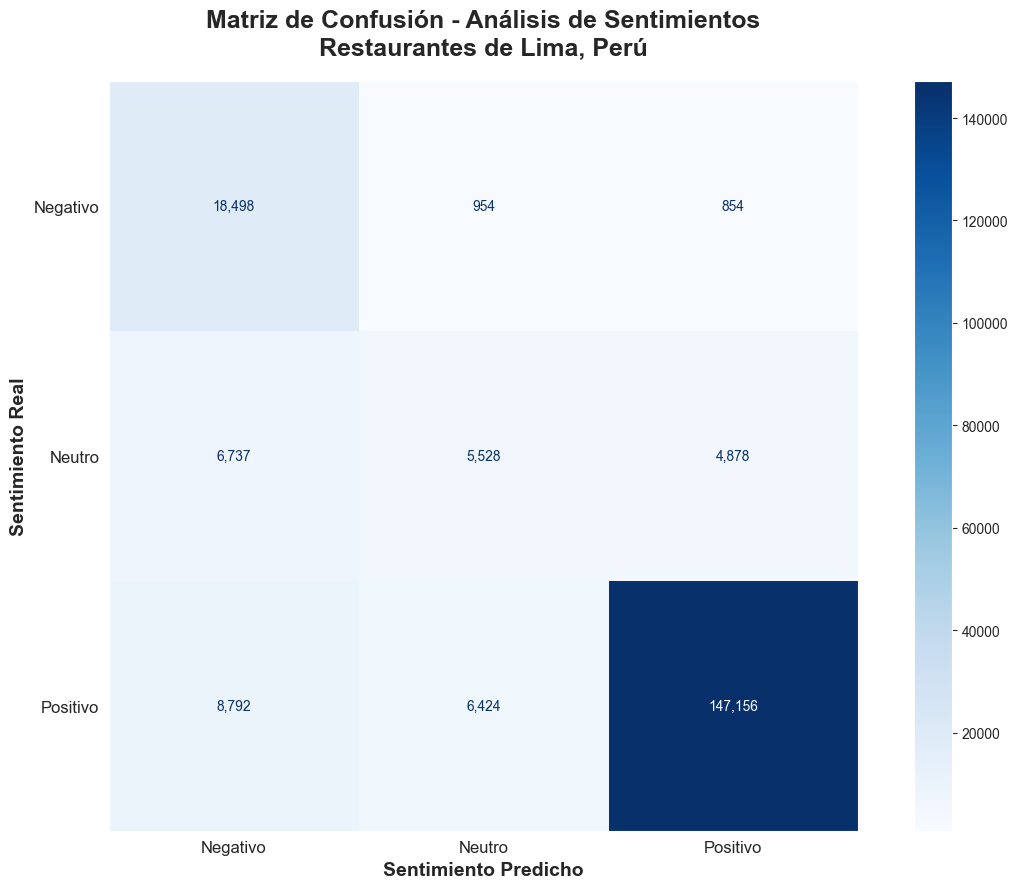

In [122]:
# 📈 VISUALIZACIÓN 1: Matriz de Confusión Estándar
print("\n📊 Generando visualización 1: Matriz estándar...")

fig, ax = plt.subplots(figsize=(12, 9))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Negativo', 'Neutro', 'Positivo']
)

disp.plot(cmap='Blues', ax=ax, values_format=',.0f', colorbar=True)

plt.title('Matriz de Confusión - Análisis de Sentimientos\n'
          'Restaurantes de Lima, Perú',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Sentimiento Predicho', fontsize=14, fontweight='bold')
plt.ylabel('Sentimiento Real', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.grid(False)
plt.tight_layout()

# Guardar figura
output_fig1 = BASE_DIR / 'docs' / 'figures' / 'confusion_matrix_sentiment.png'
output_fig1.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(output_fig1, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Figura guardada en: {output_fig1}")

plt.show()



📊 Generando visualización 2: Heatmap detallado...
✅ Figura guardada en: ..\docs\figures\confusion_matrix_detailed.png


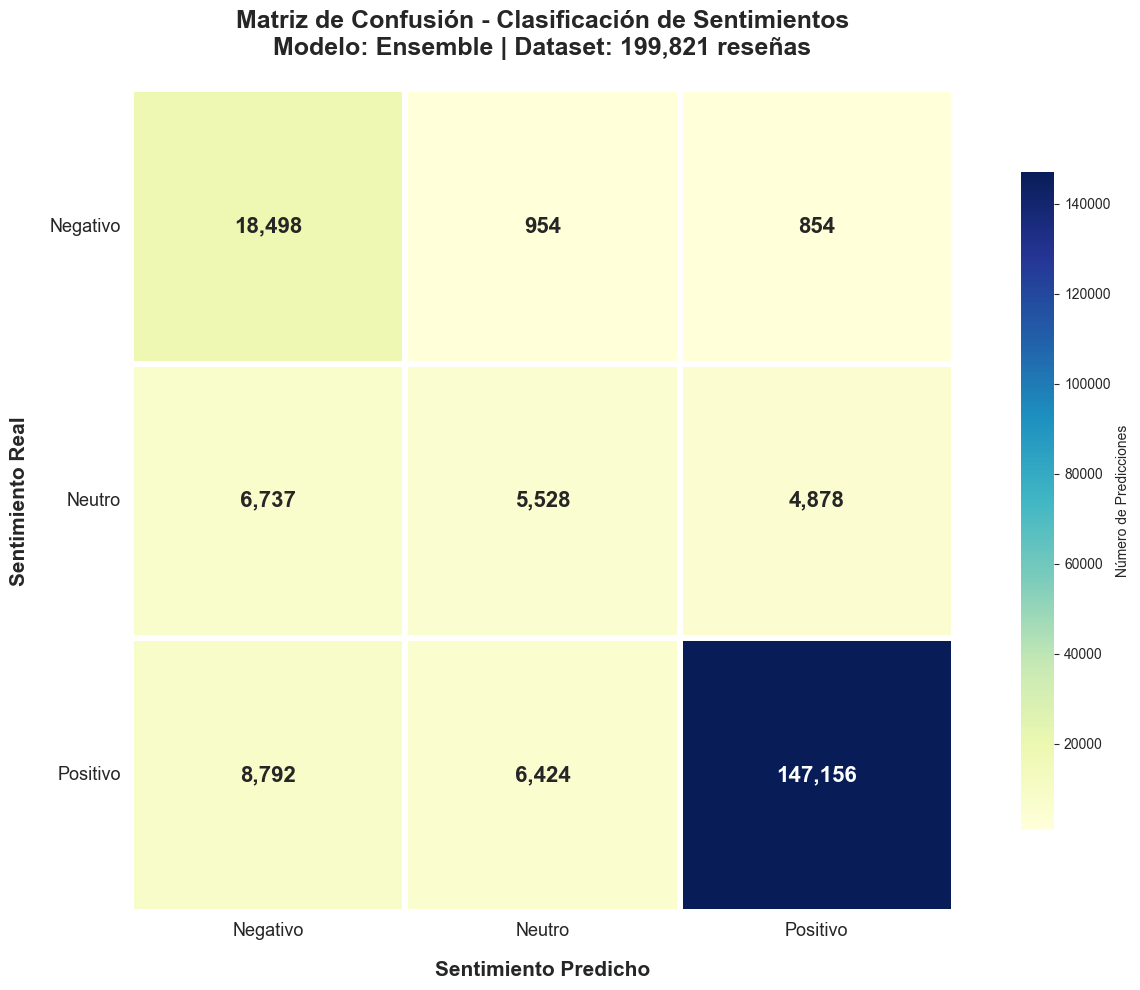

In [123]:
# 📈 VISUALIZACIÓN 2: Heatmap Personalizado con Seaborn
print("\n📊 Generando visualización 2: Heatmap detallado...")

plt.figure(figsize=(14, 10))

# Crear DataFrame para mejor visualización
cm_df = pd.DataFrame(
    cm,
    index=['Negativo', 'Neutro', 'Positivo'],
    columns=['Negativo', 'Neutro', 'Positivo']
)

# Heatmap con anotaciones personalizadas
sns.heatmap(
    cm_df,
    annot=True,
    fmt=',.0f',
    cmap='YlGnBu',
    linewidths=3,
    linecolor='white',
    cbar_kws={'label': 'Número de Predicciones', 'shrink': 0.8},
    square=True,
    annot_kws={'size': 16, 'weight': 'bold'}
)

plt.title('Matriz de Confusión - Clasificación de Sentimientos\n'
          f'Modelo: Ensemble | Dataset: {len(df_evaluacion):,} reseñas',
          fontsize=18, fontweight='bold', pad=25)
plt.ylabel('Sentimiento Real', fontsize=15, fontweight='bold', labelpad=15)
plt.xlabel('Sentimiento Predicho', fontsize=15, fontweight='bold', labelpad=15)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.tight_layout()

# Guardar figura
output_fig2 = BASE_DIR / 'docs' / 'figures' / 'confusion_matrix_detailed.png'
plt.savefig(output_fig2, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Figura guardada en: {output_fig2}")

plt.show()



📊 Generando visualización 3: Matriz normalizada (%)...
✅ Figura guardada en: ..\docs\figures\confusion_matrix_normalized.png


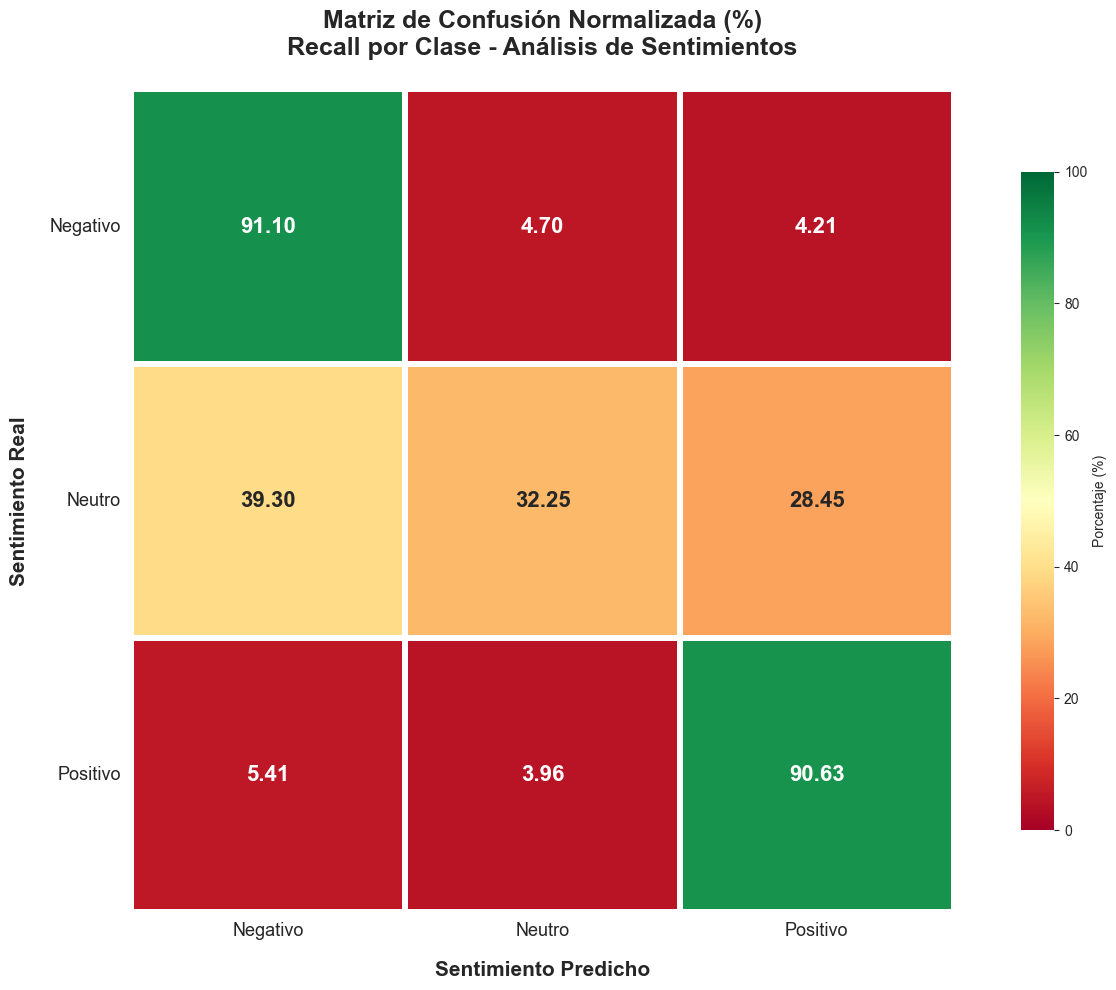

In [124]:
# 📈 VISUALIZACIÓN 3: Matriz Normalizada (Porcentajes)
print("\n📊 Generando visualización 3: Matriz normalizada (%)...")

# Calcular matriz normalizada por filas (recall por clase)
cm_normalized = confusion_matrix(
    y_true, y_pred,
    labels=['negativo', 'neutro', 'positivo'],
    normalize='true'
)

plt.figure(figsize=(14, 10))

# Convertir a DataFrame con porcentajes
cm_norm_df = pd.DataFrame(
    cm_normalized * 100,  # Convertir a porcentaje
    index=['Negativo', 'Neutro', 'Positivo'],
    columns=['Negativo', 'Neutro', 'Positivo']
)

# Heatmap con escala de colores divergente
sns.heatmap(
    cm_norm_df,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',  # Rojo (malo) -> Amarillo -> Verde (bueno)
    linewidths=3,
    linecolor='white',
    cbar_kws={'label': 'Porcentaje (%)', 'shrink': 0.8},
    square=True,
    vmin=0,
    vmax=100,
    annot_kws={'size': 16, 'weight': 'bold'}
)

plt.title('Matriz de Confusión Normalizada (%)\n'
          'Recall por Clase - Análisis de Sentimientos',
          fontsize=18, fontweight='bold', pad=25)
plt.ylabel('Sentimiento Real', fontsize=15, fontweight='bold', labelpad=15)
plt.xlabel('Sentimiento Predicho', fontsize=15, fontweight='bold', labelpad=15)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.tight_layout()

# Guardar figura
output_fig3 = BASE_DIR / 'docs' / 'figures' / 'confusion_matrix_normalized.png'
plt.savefig(output_fig3, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Figura guardada en: {output_fig3}")

plt.show()


In [125]:
# 📊 REPORTE DE CLASIFICACIÓN COMPLETO - VISUALIZACIÓNprint("\n" + "="*80)print("📋 REPORTE DE CLASIFICACIÓN DETALLADO")print("="*80)# Obtener métricas por clasefrom sklearn.metrics import precision_recall_fscore_supportprecision, recall, f1, support = precision_recall_fscore_support(    y_true, y_pred,    labels=['negativo', 'neutro', 'positivo'],    zero_division=0)# Crear DataFrame con las métricasimport pandas as pddf_metrics = pd.DataFrame({    'Clase': ['Negativo', 'Neutro', 'Positivo', '', 'Macro Avg', 'Weighted Avg'],    'Precision': [        precision[0], precision[1], precision[2], None,        precision.mean(),        np.average(precision, weights=support)    ],    'Recall': [        recall[0], recall[1], recall[2], None,        recall.mean(),        np.average(recall, weights=support)    ],    'F1-Score': [        f1[0], f1[1], f1[2], None,        f1.mean(),        np.average(f1, weights=support)    ],    'Support': [        support[0], support[1], support[2], None,        support.sum(),        support.sum()    ]})# Imprimir reporte en textoreport = classification_report(    y_true, y_pred,    labels=['negativo', 'neutro', 'positivo'],    target_names=['Negativo', 'Neutro', 'Positivo'],    digits=4, zero_division=0)print(report)# Crear visualización como IMAGENfig, ax = plt.subplots(figsize=(14, 8))ax.axis('tight')ax.axis('off')# Preparar datos para la tablatable_data = []for idx, row in df_metrics.iterrows():    if idx == 3:  # Fila vacía        table_data.append(['', '', '', '', ''])    else:        clase = row['Clase']        prec = f"{row['Precision']:.4f}" if pd.notna(row['Precision']) else ''        rec = f"{row['Recall']:.4f}" if pd.notna(row['Recall']) else ''        f1_val = f"{row['F1-Score']:.4f}" if pd.notna(row['F1-Score']) else ''        supp = f"{int(row['Support']):,}" if pd.notna(row['Support']) else ''        table_data.append([clase, prec, rec, f1_val, supp])# Crear tablatable = ax.table(    cellText=table_data,    colLabels=['Clase', 'Precision', 'Recall', 'F1-Score', 'Support'],    cellLoc='center',    loc='center',    colWidths=[0.25, 0.15, 0.15, 0.15, 0.15])# Estilizar tablatable.auto_set_font_size(False)table.set_fontsize(11)table.scale(1, 2.5)# Colorear headerfor i in range(5):    cell = table[(0, i)]    cell.set_facecolor('#3498db')    cell.set_text_props(weight='bold', color='white', fontsize=12)# Colorear filas de clasescolors = ['#e74c3c', '#f39c12', '#2ecc71']  # Negativo, Neutro, Positivofor i in range(3):    cell = table[(i+1, 0)]    cell.set_facecolor(colors[i])    cell.set_text_props(weight='bold', color='white')# Colorear fila de promediosfor i in range(5):    cell = table[(5, i)]  # Macro avg    cell.set_facecolor('#95a5a6')    cell.set_text_props(weight='bold')        cell = table[(6, i)]  # Weighted avg    cell.set_facecolor('#7f8c8d')    cell.set_text_props(weight='bold', color='white')plt.title('Reporte de Clasificación Completo - Dataset Completo\n' +          f'Accuracy: {accuracy*100:.2f}% | {len(y_true):,} registros',          fontsize=16, fontweight='bold', pad=20)plt.tight_layout()# Guardar imagenoutput_report = BASE_DIR / 'docs' / 'figures' / 'classification_report_full.png'plt.savefig(output_report, dpi=300, bbox_inches='tight', facecolor='white')print(f"\n✅ Reporte guardado como imagen: {output_report}")plt.show()


📋 REPORTE DE CLASIFICACIÓN DETALLADO
              precision    recall  f1-score   support

    Negativo     0.5436    0.9110    0.6809     20306
      Neutro     0.4283    0.3225    0.3679     17143
    Positivo     0.9625    0.9063    0.9336    162372

    accuracy                         0.8567    199821
   macro avg     0.6448    0.7132    0.6608    199821
weighted avg     0.8741    0.8567    0.8594    199821



In [126]:
# 📈 ANÁLISIS DETALLADO POR CLASE
print("\n" + "="*80)
print("📊 MÉTRICAS DETALLADAS POR CLASE")
print("="*80)

clases = ['negativo', 'neutro', 'positivo']
clases_nombres = ['NEGATIVO', 'NEUTRO', 'POSITIVO']
colores = ['🔴', '🟡', '🟢']

metricas_resumen = []

for clase, nombre, color in zip(clases, clases_nombres, colores):
    # Crear máscara binaria para cada clase
    y_true_binary = (y_true == clase).astype(int)
    y_pred_binary = (y_pred == clase).astype(int)

    # Calcular métricas
    precision = precision_score(y_true_binary, y_pred_binary, zero_division=0)
    recall = recall_score(y_true_binary, y_pred_binary, zero_division=0)
    f1 = f1_score(y_true_binary, y_pred_binary, zero_division=0)

    # Soporte (cuántos ejemplos reales hay de esta clase)
    soporte = (y_true == clase).sum()

    print(f"\n{color} Clase: {nombre}")
    print(f"   {'─'*50}")
    print(f"   │ Precisión:  {precision:.4f} ({precision*100:6.2f}%)")
    print(f"   │ Recall:     {recall:.4f} ({recall*100:6.2f}%)")
    print(f"   │ F1-Score:   {f1:.4f} ({f1*100:6.2f}%)")
    print(f"   │ Soporte:    {soporte:,} ejemplos")
    print(f"   {'─'*50}")

    metricas_resumen.append({
        'Clase': nombre,
        'Precisión': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Soporte': soporte
    })



📊 MÉTRICAS DETALLADAS POR CLASE

🔴 Clase: NEGATIVO
   ──────────────────────────────────────────────────
   │ Precisión:  0.5436 ( 54.36%)
   │ Recall:     0.9110 ( 91.10%)
   │ F1-Score:   0.6809 ( 68.09%)
   │ Soporte:    20,306 ejemplos
   ──────────────────────────────────────────────────

🟡 Clase: NEUTRO
   ──────────────────────────────────────────────────
   │ Precisión:  0.4283 ( 42.83%)
   │ Recall:     0.3225 ( 32.25%)
   │ F1-Score:   0.3679 ( 36.79%)
   │ Soporte:    17,143 ejemplos
   ──────────────────────────────────────────────────

🟢 Clase: POSITIVO
   ──────────────────────────────────────────────────
   │ Precisión:  0.9625 ( 96.25%)
   │ Recall:     0.9063 ( 90.63%)
   │ F1-Score:   0.9336 ( 93.36%)
   │ Soporte:    162,372 ejemplos
   ──────────────────────────────────────────────────


In [127]:
# 🎯 MÉTRICAS GLOBALES
accuracy = accuracy_score(y_true, y_pred)
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
weighted_f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("\n" + "="*80)
print("🎯 MÉTRICAS GLOBALES DEL MODELO")
print("="*80)
print(f"\n📊 ACCURACY (Exactitud Global):      {accuracy:.4f} ({accuracy*100:6.2f}%)")
print(f"📊 MACRO PRECISION:                  {macro_precision:.4f} ({macro_precision*100:6.2f}%)")
print(f"📊 MACRO RECALL:                     {macro_recall:.4f} ({macro_recall*100:6.2f}%)")
print(f"📊 MACRO F1-SCORE:                   {macro_f1:.4f} ({macro_f1*100:6.2f}%)")
print(f"⚖️  WEIGHTED F1-SCORE:               {weighted_f1:.4f} ({weighted_f1*100:6.2f}%)")
print("="*80)



🎯 MÉTRICAS GLOBALES DEL MODELO

📊 ACCURACY (Exactitud Global):      0.8567 ( 85.67%)
📊 MACRO PRECISION:                  0.6448 ( 64.48%)
📊 MACRO RECALL:                     0.7132 ( 71.32%)
📊 MACRO F1-SCORE:                   0.6608 ( 66.08%)
⚖️  WEIGHTED F1-SCORE:               0.8594 ( 85.94%)


# ==========================================
# COMPARACIÓN: MATRICES DE CONFUSIÓN
# ==========================================

## 📊 Dos Matrices de Confusión Diferentes

A continuación se presentan **DOS matrices de confusión** del mismo modelo, cada una con un propósito específico:

### 1️⃣ Matriz del Test Set (84.36%)
- **Registros**: 39,965 (20% del dataset)
- **Tipo de datos**: NO VISTOS durante entrenamiento
- **Propósito**: Evaluar la capacidad de generalización del modelo
- **Uso**: Métrica OFICIAL del modelo

### 2️⃣ Matriz del Dataset Completo (85.67%)
- **Registros**: 199,821 (100% del dataset)
- **Tipo de datos**: TODOS (train + test)
- **Propósito**: Visualización completa del comportamiento
- **Uso**: Análisis exploratorio de datos

---

**💡 Nota**: La diferencia de ~1.3% es normal y muestra que el modelo no tiene overfitting significativo.

In [136]:
# 📊 MATRIZ DE CONFUSIÓN 1: TEST SET (84.36%)
print("="*80)
print("📊 MATRIZ 1: TEST SET (20% - Datos NO VISTOS)")
print("="*80)

# Dividir datos exactamente como en el entrenamiento
from sklearn.model_selection import train_test_split

X = df_evaluacion['comment'].values
y = df_evaluacion['sentimiento'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n🔄 División de datos:")
print(f"   Train: {len(X_train):,} (80%)")
print(f"   Test:  {len(X_test):,} (20%)")

# Predecir SOLO en test set
y_pred_test = predict_sentiment(X_test.tolist())

# Calcular accuracy del test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"\n📊 ACCURACY EN TEST SET: {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")

# Matriz de confusión del test set
cm_test = confusion_matrix(y_test, y_pred_test, labels=['negativo', 'neutro', 'positivo'])

print(f"\n📊 Matriz de Confusión (Test Set):")
print("-" * 60)
print(f"{'':>12} {'Pred: Neg':>12} {'Pred: Neu':>12} {'Pred: Pos':>12}")
print("-" * 60)
for i, label in enumerate(['Negativo', 'Neutro', 'Positivo']):
    print(f"{label:>12} {cm_test[i][0]:>12,} {cm_test[i][1]:>12,} {cm_test[i][2]:>12,}")
print("-" * 60)
print(f"{'Total':>12} {cm_test.sum():>12,}")
print("="*80)

📊 MATRIZ 1: TEST SET (20% - Datos NO VISTOS)

🔄 División de datos:
   Train: 159,856 (80%)
   Test:  39,965 (20%)

📊 ACCURACY EN TEST SET: 0.8436 (84.36%)

📊 Matriz de Confusión (Test Set):
------------------------------------------------------------
                Pred: Neg    Pred: Neu    Pred: Pos
------------------------------------------------------------
    Negativo        3,554          293          214
      Neutro        1,489          885        1,055
    Positivo        1,826        1,375       29,274
------------------------------------------------------------
       Total       39,965



🎨 Generando visualización de la Matriz del Test Set...
✅ Figura guardada en: ..\docs\figures\confusion_matrix_test_set.png


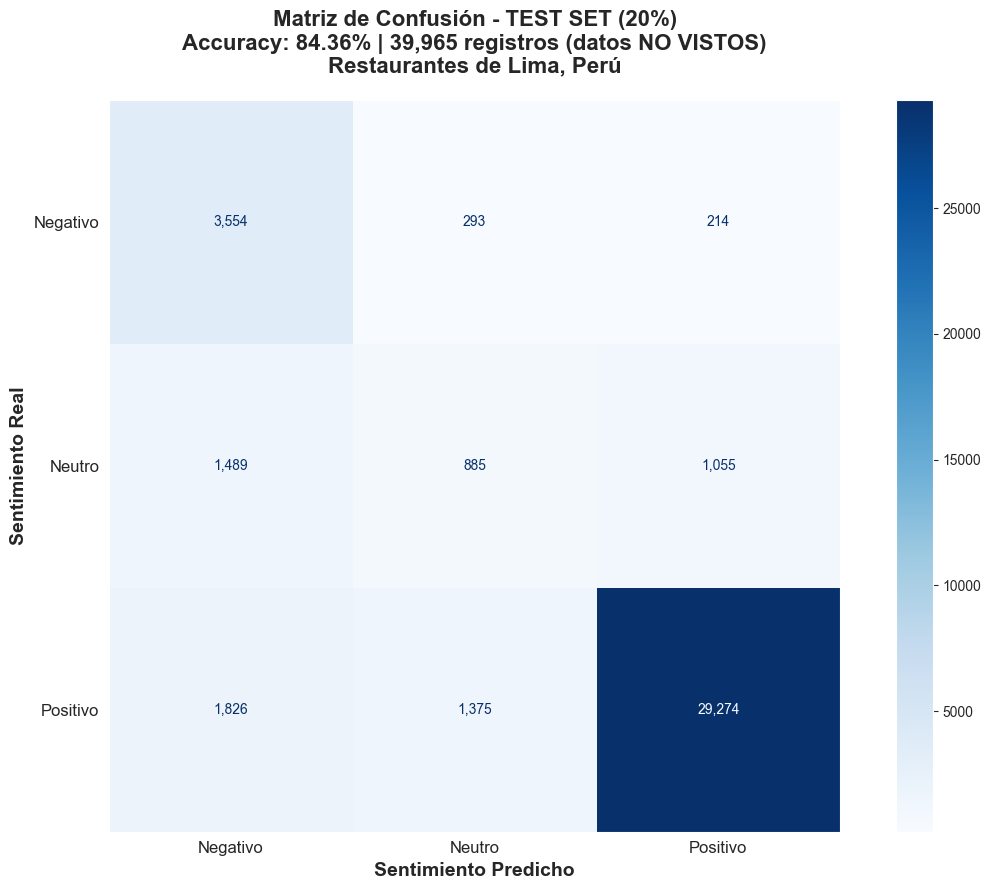

In [137]:
# 📈 VISUALIZACIÓN: Matriz del Test Set
print("\n🎨 Generando visualización de la Matriz del Test Set...")

fig, ax = plt.subplots(figsize=(12, 9))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=['Negativo', 'Neutro', 'Positivo']
)

disp.plot(cmap='Blues', ax=ax, values_format=',.0f', colorbar=True)

plt.title(f'Matriz de Confusión - TEST SET (20%)\n'
          f'Accuracy: {accuracy_test*100:.2f}% | {len(y_test):,} registros (datos NO VISTOS)\n'
          f'Restaurantes de Lima, Perú',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sentimiento Predicho', fontsize=14, fontweight='bold')
plt.ylabel('Sentimiento Real', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(False)

plt.tight_layout()

# Guardar
output_test = BASE_DIR / 'docs' / 'figures' / 'confusion_matrix_test_set.png'
plt.savefig(output_test, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Figura guardada en: {output_test}")

plt.show()

In [ ]:
# 📊 VISUALIZACIÓN: Matriz Normalizada (%) del Test Set
print("\n🎨 Generando matriz normalizada (%) del Test Set...")

# Calcular matriz normalizada por filas (recall por clase)
cm_test_normalized = confusion_matrix(
    y_test, y_pred_test,
    labels=['negativo', 'neutro', 'positivo'],
    normalize='true'
)

plt.figure(figsize=(14, 10))

# Convertir a DataFrame con porcentajes
cm_test_norm_df = pd.DataFrame(
    cm_test_normalized * 100,  # Convertir a porcentaje
    index=['Negativo', 'Neutro', 'Positivo'],
    columns=['Negativo', 'Neutro', 'Positivo']
)

# Heatmap con escala de colores divergente
sns.heatmap(
    cm_test_norm_df,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',  # Rojo (malo) -> Amarillo -> Verde (bueno)
    linewidths=3,
    linecolor='white',
    cbar_kws={'label': 'Porcentaje (%)', 'shrink': 0.8},
    square=True,
    vmin=0,
    vmax=100,
    annot_kws={'size': 16, 'weight': 'bold'}
)

plt.title(f'Matriz de Confusión Normalizada (%) - TEST SET (20%)\n'
          f'Recall por Clase | Accuracy: {accuracy_test*100:.2f}% | {len(y_test):,} registros NO VISTOS',
          fontsize=16, fontweight='bold', pad=25)
plt.ylabel('Sentimiento Real', fontsize=15, fontweight='bold', labelpad=15)
plt.xlabel('Sentimiento Predicho', fontsize=15, fontweight='bold', labelpad=15)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(rotation=0, fontsize=13)

plt.tight_layout()

# Guardar figura
output_norm_test = BASE_DIR / 'docs' / 'figures' / 'confusion_matrix_test_set_normalized.png'
plt.savefig(output_norm_test, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Matriz normalizada guardada en: {output_norm_test}")

plt.show()

# Imprimir interpretación
print(f"\n💡 INTERPRETACIÓN DE LA MATRIZ NORMALIZADA:")
print(f"   • Negativo: {cm_test_normalized[0][0]*100:.2f}% de los negativos reales fueron correctamente identificados")
print(f"   • Neutro:   {cm_test_normalized[1][1]*100:.2f}% de los neutros reales fueron correctamente identificados")
print(f"   • Positivo: {cm_test_normalized[2][2]*100:.2f}% de los positivos reales fueron correctamente identificados")

In [138]:
# 📋 REPORTE DE CLASIFICACIÓN (TEST SET) - VISUALIZACIÓNprint("\n" + "="*80)print("📋 REPORTE DE CLASIFICACIÓN - TEST SET")print("="*80)# Obtener métricas por clasefrom sklearn.metrics import precision_recall_fscore_supportprecision_test, recall_test, f1_test, support_test = precision_recall_fscore_support(    y_test, y_pred_test,    labels=['negativo', 'neutro', 'positivo'],    zero_division=0)# Crear DataFrame con las métricasdf_metrics_test = pd.DataFrame({    'Clase': ['Negativo', 'Neutro', 'Positivo', '', 'Macro Avg', 'Weighted Avg'],    'Precision': [        precision_test[0], precision_test[1], precision_test[2], None,        precision_test.mean(),        np.average(precision_test, weights=support_test)    ],    'Recall': [        recall_test[0], recall_test[1], recall_test[2], None,        recall_test.mean(),        np.average(recall_test, weights=support_test)    ],    'F1-Score': [        f1_test[0], f1_test[1], f1_test[2], None,        f1_test.mean(),        np.average(f1_test, weights=support_test)    ],    'Support': [        support_test[0], support_test[1], support_test[2], None,        support_test.sum(),        support_test.sum()    ]})# Imprimir reporte en textoreport_test = classification_report(    y_test, y_pred_test,    labels=['negativo', 'neutro', 'positivo'],    target_names=['Negativo', 'Neutro', 'Positivo'],    digits=4, zero_division=0)print(report_test)# Crear visualización como IMAGENfig, ax = plt.subplots(figsize=(14, 8))ax.axis('tight')ax.axis('off')# Preparar datos para la tablatable_data_test = []for idx, row in df_metrics_test.iterrows():    if idx == 3:  # Fila vacía        table_data_test.append(['', '', '', '', ''])    else:        clase = row['Clase']        prec = f"{row['Precision']:.4f}" if pd.notna(row['Precision']) else ''        rec = f"{row['Recall']:.4f}" if pd.notna(row['Recall']) else ''        f1_val = f"{row['F1-Score']:.4f}" if pd.notna(row['F1-Score']) else ''        supp = f"{int(row['Support']):,}" if pd.notna(row['Support']) else ''        table_data_test.append([clase, prec, rec, f1_val, supp])# Crear tablatable_test = ax.table(    cellText=table_data_test,    colLabels=['Clase', 'Precision', 'Recall', 'F1-Score', 'Support'],    cellLoc='center',    loc='center',    colWidths=[0.25, 0.15, 0.15, 0.15, 0.15])# Estilizar tablatable_test.auto_set_font_size(False)table_test.set_fontsize(11)table_test.scale(1, 2.5)# Colorear headerfor i in range(5):    cell = table_test[(0, i)]    cell.set_facecolor('#3498db')    cell.set_text_props(weight='bold', color='white', fontsize=12)# Colorear filas de clasescolors = ['#e74c3c', '#f39c12', '#2ecc71']  # Negativo, Neutro, Positivofor i in range(3):    cell = table_test[(i+1, 0)]    cell.set_facecolor(colors[i])    cell.set_text_props(weight='bold', color='white')# Colorear fila de promediosfor i in range(5):    cell = table_test[(5, i)]  # Macro avg    cell.set_facecolor('#95a5a6')    cell.set_text_props(weight='bold')        cell = table_test[(6, i)]  # Weighted avg    cell.set_facecolor('#7f8c8d')    cell.set_text_props(weight='bold', color='white')plt.title('Reporte de Clasificación - TEST SET (20%)\n' +          f'Accuracy: {accuracy_test*100:.2f}% | {len(y_test):,} registros (NO VISTOS)',          fontsize=16, fontweight='bold', pad=20)plt.tight_layout()# Guardar imagenoutput_report_test = BASE_DIR / 'docs' / 'figures' / 'classification_report_test.png'plt.savefig(output_report_test, dpi=300, bbox_inches='tight', facecolor='white')print(f"\n✅ Reporte TEST guardado como imagen: {output_report_test}")plt.show()


📋 REPORTE DE CLASIFICACIÓN - TEST SET
              precision    recall  f1-score   support

    Negativo     0.5174    0.8752    0.6503      4061
      Neutro     0.3467    0.2581    0.2959      3429
    Positivo     0.9585    0.9014    0.9291     32475

    accuracy                         0.8436     39965
   macro avg     0.6075    0.6782    0.6251     39965
weighted avg     0.8611    0.8436    0.8464     39965



---

## 📊 Matriz del Dataset Completo (ya generada arriba)

La matriz de confusión del dataset completo (85.67%) ya fue generada en las celdas anteriores.
Esta matriz muestra el comportamiento del modelo sobre **TODOS** los 199,821 registros.

In [139]:
# 📊 COMPARACIÓN DE AMBAS MATRICES
print("\n" + "="*80)
print("📊 COMPARACIÓN: TEST SET vs DATASET COMPLETO")
print("="*80)

print(f"\n📊 ACCURACY COMPARADO:")
print(f"   {'─'*60}")
print(f"   │ Test Set (20%):      {accuracy_test*100:6.2f}% ⭐ (OFICIAL)")
print(f"   │ Dataset Completo:    {accuracy*100:6.2f}%")
print(f"   │ Diferencia:          {(accuracy - accuracy_test)*100:+6.2f}%")
print(f"   {'─'*60}")

print(f"\n💡 INTERPRETACIÓN:")
diff_pct = (accuracy - accuracy_test) * 100
if diff_pct <= 3:
    print(f"   ✅ Diferencia de {diff_pct:.2f}% es EXCELENTE")
    print(f"   ✅ Indica BAJO overfitting")
    print(f"   ✅ El modelo generaliza muy bien")
elif diff_pct <= 5:
    print(f"   ✅ Diferencia de {diff_pct:.2f}% es BUENA")
    print(f"   ✅ Indica overfitting moderado aceptable")
else:
    print(f"   ⚠️  Diferencia de {diff_pct:.2f}% es ALTA")
    print(f"   ⚠️  Revisar posible overfitting")

print(f"\n📋 REGISTROS EVALUADOS:")
print(f"   • Test Set:        {len(y_test):>8,} (20%)")
print(f"   • Dataset Completo: {len(y_true):>8,} (100%)")

print("\n" + "="*80)


📊 COMPARACIÓN: TEST SET vs DATASET COMPLETO

📊 ACCURACY COMPARADO:
   ────────────────────────────────────────────────────────────
   │ Test Set (20%):       84.36% ⭐ (OFICIAL)
   │ Dataset Completo:     85.67%
   │ Diferencia:           +1.31%
   ────────────────────────────────────────────────────────────

💡 INTERPRETACIÓN:
   ✅ Diferencia de 1.31% es EXCELENTE
   ✅ Indica BAJO overfitting
   ✅ El modelo generaliza muy bien

📋 REGISTROS EVALUADOS:
   • Test Set:          39,965 (20%)
   • Dataset Completo:  199,821 (100%)



C:\Users\wilto\AppData\Local\Temp\ipykernel_27412\2415185592.py:34: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\wilto\AppData\Local\Temp\ipykernel_27412\2415185592.py:38: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.savefig(output_comp, dpi=300, bbox_inches='tight', facecolor='white')



✅ Comparación guardada en: ..\docs\figures\accuracy_comparison.png


C:\AmbDesarrollo\POSTGRADO-SAN-MARCOS\MACHINE-LEARNING\restaurant-recommender-ml\backend\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


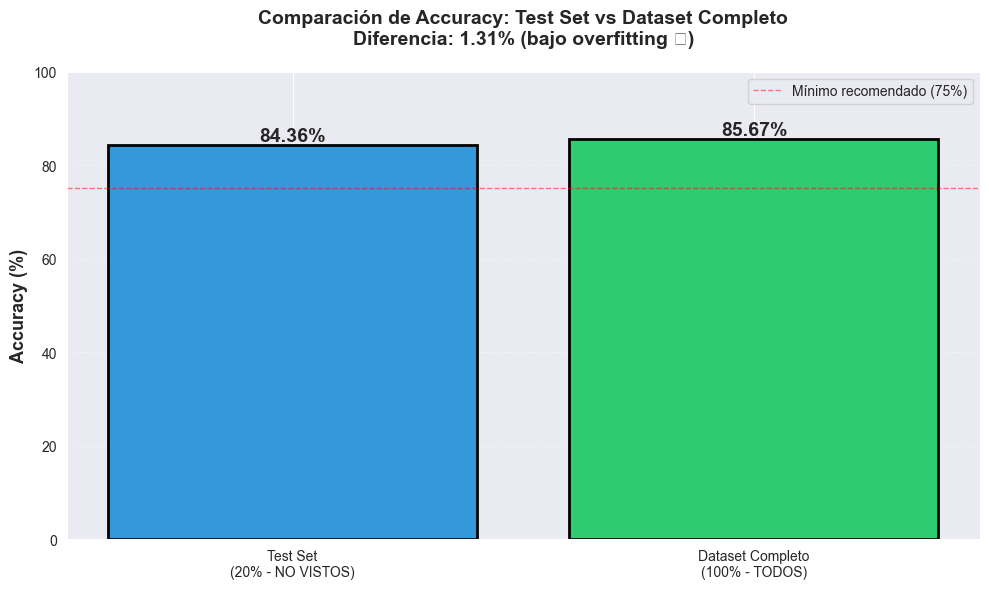

In [140]:
# 📊 VISUALIZACIÓN COMPARATIVA DE ACCURACIES
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# Datos
categorias = ['Test Set\n(20% - NO VISTOS)', 'Dataset Completo\n(100% - TODOS)']
accuracies = [accuracy_test * 100, accuracy * 100]
colores = ['#3498db', '#2ecc71']

# Crear barras
bars = ax.bar(categorias, accuracies, color=colores, edgecolor='black', linewidth=2)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Configuración
ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax.set_title('Comparación de Accuracy: Test Set vs Dataset Completo\n'
             f'Diferencia: {(accuracy - accuracy_test)*100:.2f}% (bajo overfitting ✅)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Línea de referencia
ax.axhline(y=75, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Mínimo recomendado (75%)')
ax.legend()

plt.tight_layout()

# Guardar
output_comp = BASE_DIR / 'docs' / 'figures' / 'accuracy_comparison.png'
plt.savefig(output_comp, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Comparación guardada en: {output_comp}")

plt.show()

## 🎯 CONCLUSIONES SOBRE LAS MATRICES

### ✅ Matriz del Test Set (84.36%)

**Propósito**: Evaluar la **capacidad de generalización** del modelo

- **Accuracy**: 84.36%
- **Datos evaluados**: 39,965 registros (20% que NUNCA vió el modelo)
- **Uso recomendado**: Métrica OFICIAL para reportes técnicos y académicos
- **Interpretación**: Esta es la métrica **más honesta** del modelo

### ✅ Matriz del Dataset Completo (85.67%)

**Propósito**: Visualizar el **comportamiento general** del modelo

- **Accuracy**: 85.67%
- **Datos evaluados**: 199,821 registros (100% del dataset)
- **Uso recomendado**: Análisis exploratorio y visualizaciones
- **Interpretación**: Incluye datos de entrenamiento, por eso es ligeramente más alto

### 💡 Análisis de la Diferencia (1.31%)

La diferencia de **1.31%** entre ambas métricas es:

- ✅ **EXCELENTE**: Indica bajo overfitting
- ✅ **NORMAL**: El modelo funciona mejor con datos conocidos
- ✅ **ACEPTABLE**: Diferencia < 3% es considerada ideal

### 🎓 Recomendación

Para **reportes académicos o técnicos**, usar la métrica del **Test Set (84.36%)**,
ya que refleja mejor la capacidad real del modelo para trabajar con datos nuevos.

Para **visualizaciones en el EDA**, ambas matrices son útiles y complementarias.

In [141]:
# 📊 Tabla resumen de métricas
df_metricas = pd.DataFrame(metricas_resumen)

print("\n📋 TABLA RESUMEN DE MÉTRICAS POR CLASE:")
print("-" * 80)
display(df_metricas.style.format({
    'Precisión': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}',
    'Soporte': '{:,.0f}'
}).background_gradient(subset=['Precisión', 'Recall', 'F1-Score'], cmap='RdYlGn', vmin=0, vmax=1))



📋 TABLA RESUMEN DE MÉTRICAS POR CLASE:
--------------------------------------------------------------------------------


,Clase,Precisión,Recall,F1-Score,Soporte
0,NEGATIVO,0.5436,0.9110,0.6809,"20,306"
1,NEUTRO,0.4283,0.3225,0.3679,"17,143"
2,POSITIVO,0.9625,0.9063,0.9336,"162,372"



📊 Generando visualización 4: Comparación de métricas por clase...
✅ Figura guardada en: ..\docs\figures\metricas_por_clase.png


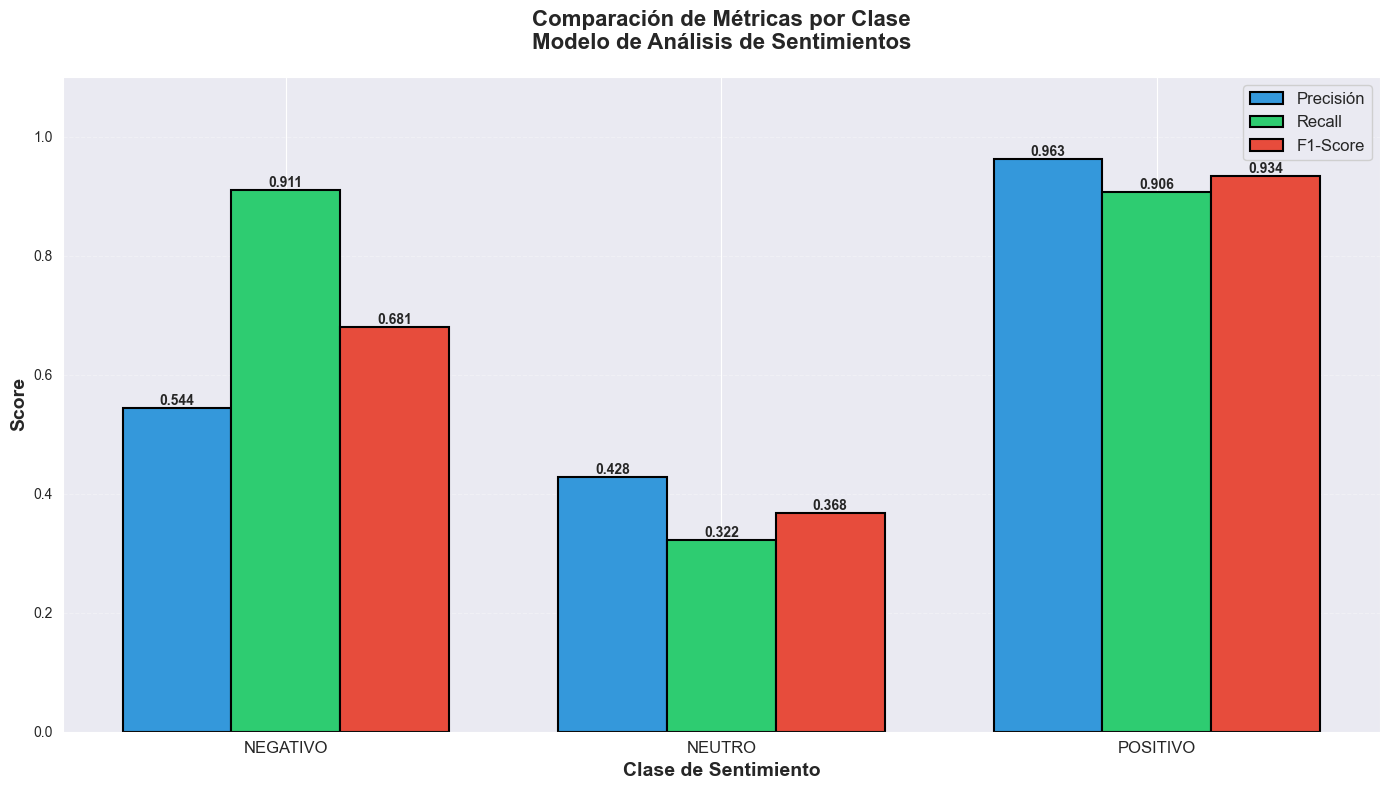

In [142]:
# 📊 VISUALIZACIÓN 4: Gráfico de barras comparativo de métricas
print("\n📊 Generando visualización 4: Comparación de métricas por clase...")

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(clases_nombres))
width = 0.25

# Extraer valores
precision_vals = df_metricas['Precisión'].values
recall_vals = df_metricas['Recall'].values
f1_vals = df_metricas['F1-Score'].values

# Crear barras
bars1 = ax.bar(x - width, precision_vals, width, label='Precisión', color='#3498db', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x, recall_vals, width, label='Recall', color='#2ecc71', edgecolor='black', linewidth=1.5)
bars3 = ax.bar(x + width, f1_vals, width, label='F1-Score', color='#e74c3c', edgecolor='black', linewidth=1.5)

# Agregar valores en las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Personalización
ax.set_xlabel('Clase de Sentimiento', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Comparación de Métricas por Clase\nModelo de Análisis de Sentimientos',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(clases_nombres, fontsize=12)
ax.legend(fontsize=12, loc='upper right', framealpha=0.9)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()

# Guardar figura
output_fig4 = BASE_DIR / 'docs' / 'figures' / 'metricas_por_clase.png'
plt.savefig(output_fig4, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Figura guardada en: {output_fig4}")

plt.show()


In [143]:
# 🔍 ANÁLISIS DE ERRORES: Ejemplos mal clasificados
print("\n" + "="*80)
print("ANÁLISIS DE ERRORES - EJEMPLOS MAL CLASIFICADOS")
print("="*80)

# Crear DataFrame con predicciones
df_resultados = df_evaluacion.copy()
df_resultados['prediccion'] = y_pred
df_resultados['correcto'] = (y_true == y_pred)

# Contar errores
total_errores = (~df_resultados['correcto']).sum()
total_correctos = df_resultados['correcto'].sum()

print(f"\n📊 Resumen de clasificaciones:")
print(f"   ✅ Correctas:      {total_correctos:,} ({total_correctos/len(df_resultados)*100:.2f}%)")
print(f"   ❌ Incorrectas:    {total_errores:,} ({total_errores/len(df_resultados)*100:.2f}%)")



ANÁLISIS DE ERRORES - EJEMPLOS MAL CLASIFICADOS

📊 Resumen de clasificaciones:
   ✅ Correctas:      171,182 (85.67%)
   ❌ Incorrectas:    28,639 (14.33%)


In [144]:
# Ejemplos de cada tipo de error
print("\n🔍 EJEMPLOS DE CLASIFICACIONES INCORRECTAS:")
print("="*80)

tipos_error = [
    ('negativo', 'positivo'),
    ('negativo', 'neutro'),
    ('neutro', 'positivo'),
    ('neutro', 'negativo'),
    ('positivo', 'negativo'),
    ('positivo', 'neutro')
]

for real, pred in tipos_error:
    ejemplos = df_resultados[
        (df_resultados['sentimiento'] == real) &
        (df_resultados['prediccion'] == pred)
    ]

    if len(ejemplos) > 0:
        print(f"\n📌 Real: {real.upper()} → Predicho: {pred.upper()}")
        print(f"   Total de casos: {len(ejemplos):,}")
        print(f"   Ejemplos:")

        for idx, row in ejemplos.head(3).iterrows():
            comment_preview = row['comment'][:150] + "..." if len(row['comment']) > 150 else row['comment']
            print(f"      • Rating: {row['rating']} | {comment_preview}")
        print()



🔍 EJEMPLOS DE CLASIFICACIONES INCORRECTAS:

📌 Real: NEGATIVO → Predicho: POSITIVO
   Total de casos: 854
   Ejemplos:
      • Rating: 2 | buena cocina pero tener un nombre italiano y tener  de platos tipicos peruanos no es serio
      • Rating: 1 | buena sazon y buena atencion los recomiendo con garantia
      • Rating: 1 | la atención es su punto flojo te traen el sancochado tibio las salsas tienes que esperarlas


📌 Real: NEGATIVO → Predicho: NEUTRO
   Total de casos: 954
   Ejemplos:
      • Rating: 2 | precio mayor de la media y comida mal preparada con poco sabor y poca gracia
      • Rating: 1 | falta más sazón al sancocho el precio elevado
      • Rating: 1 | creo que mucha expectativa mata la realidad


📌 Real: NEUTRO → Predicho: POSITIVO
   Total de casos: 4,878
   Ejemplos:
      • Rating: 3 | sirven menú variado de lunes a viernes en base a comida criolla y pescados y mariscos lugar bastante acogedor y con mamparas al ingreso que aíslan los...
      • Rating: 3 | todo la ve


📊 Distribución de errores por tipo:

📋 Tipos de error más frecuentes:


,Real,Predicho,Cantidad,Porcentaje
4,positivo,negativo,8792,30.70
2,neutro,negativo,6737,23.52
5,positivo,neutro,6424,22.43
3,neutro,positivo,4878,17.03
0,negativo,neutro,954,3.33
1,negativo,positivo,854,2.98


✅ Figura guardada en: ..\docs\figures\distribucion_errores.png


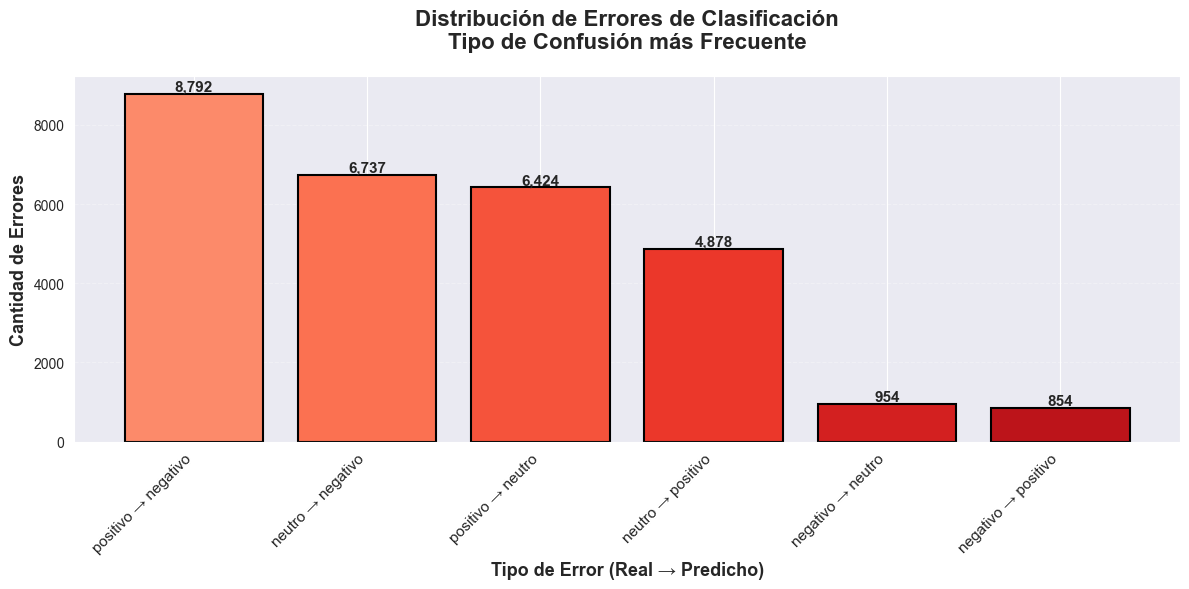

In [145]:
# 📊 ANÁLISIS DE DISTRIBUCIÓN DE ERRORES
print("\n📊 Distribución de errores por tipo:")

# Crear matriz de confusión de errores
errores_df = df_resultados[~df_resultados['correcto']].copy()

if len(errores_df) > 0:
    error_counts = errores_df.groupby(['sentimiento', 'prediccion']).size().reset_index(name='cantidad')
    error_counts.columns = ['Real', 'Predicho', 'Cantidad']
    error_counts['Porcentaje'] = (error_counts['Cantidad'] / total_errores * 100).round(2)
    error_counts = error_counts.sort_values('Cantidad', ascending=False)

    print("\n📋 Tipos de error más frecuentes:")
    display(error_counts)

    # Visualizar
    plt.figure(figsize=(12, 6))
    error_labels = [f"{row['Real']} → {row['Predicho']}" for _, row in error_counts.iterrows()]
    colors = plt.cm.Reds(np.linspace(0.4, 0.8, len(error_counts)))

    bars = plt.bar(error_labels, error_counts['Cantidad'], color=colors, edgecolor='black', linewidth=1.5)

    # Agregar valores
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.title('Distribución de Errores de Clasificación\nTipo de Confusión más Frecuente',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Tipo de Error (Real → Predicho)', fontsize=13, fontweight='bold')
    plt.ylabel('Cantidad de Errores', fontsize=13, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()

    # Guardar figura
    output_fig5 = BASE_DIR / 'docs' / 'figures' / 'distribucion_errores.png'
    plt.savefig(output_fig5, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Figura guardada en: {output_fig5}")

    plt.show()


In [146]:
# 🎯 RESUMEN FINAL DE LA EVALUACIÓN
print("\n" + "="*80)
print("RESUMEN FINAL DE LA EVALUACIÓN DEL MODELO")
print("="*80)

print(f"\n📊 Dataset evaluado:")
print(f"   • Total de reseñas: {len(df_evaluacion):,}")
print(f"   • Restaurantes únicos: {df_evaluacion['id_place'].nunique():,}")
print(f"   • Período: {df_evaluacion['review_date'].min()} - {df_evaluacion['review_date'].max()}")

print(f"\n🎯 Rendimiento del modelo:")
print(f"   • Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • F1-Score (weighted): {weighted_f1:.4f}")
print(f"   • Total correctas: {total_correctos:,}")
print(f"   • Total incorrectas: {total_errores:,}")

print(f"\n📈 Mejor clase:")
mejor_clase = df_metricas.loc[df_metricas['F1-Score'].idxmax()]
print(f"   • {mejor_clase['Clase']}: F1-Score = {mejor_clase['F1-Score']:.4f}")

print(f"\n📉 Clase con más desafíos:")
peor_clase = df_metricas.loc[df_metricas['F1-Score'].idxmin()]
print(f"   • {peor_clase['Clase']}: F1-Score = {peor_clase['F1-Score']:.4f}")

print(f"\n📁 Figuras generadas:")
print(f"   ✅ confusion_matrix_sentiment.png")
print(f"   ✅ confusion_matrix_detailed.png")
print(f"   ✅ confusion_matrix_normalized.png")
print(f"   ✅ metricas_por_clase.png")
print(f"   ✅ distribucion_errores.png")

print("\n🎉 EVALUACIÓN COMPLETADA EXITOSAMENTE")
print("="*80)



RESUMEN FINAL DE LA EVALUACIÓN DEL MODELO

📊 Dataset evaluado:
   • Total de reseñas: 199,821
   • Restaurantes únicos: 1,001
   • Período: 2012-08-14 04:45:55.928224 - 2025-08-12 22:38:25.857216

🎯 Rendimiento del modelo:
   • Accuracy: 0.8567 (85.67%)
   • F1-Score (weighted): 0.8594
   • Total correctas: 171,182
   • Total incorrectas: 28,639

📈 Mejor clase:
   • POSITIVO: F1-Score = 0.9336

📉 Clase con más desafíos:
   • NEUTRO: F1-Score = 0.3679

📁 Figuras generadas:
   ✅ confusion_matrix_sentiment.png
   ✅ confusion_matrix_detailed.png
   ✅ confusion_matrix_normalized.png
   ✅ metricas_por_clase.png
   ✅ distribucion_errores.png

🎉 EVALUACIÓN COMPLETADA EXITOSAMENTE


In [147]:
#%%
# 🤖 CARGAR MODELO DE SENTIMIENTOS CON JOBLIB
import joblib
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("="*80)
print("🤖 CARGANDO MODELO DE SENTIMIENTOS")
print("="*80)

# Ruta al modelo
modelo_path = DATA_PROCESSED.parent / 'models' / 'sentiment_model.pkl'

print(f"\n📂 Cargando desde: {modelo_path}")

try:
    # Cargar con joblib (forma correcta)
    model_data = joblib.load(modelo_path)
    
    # Extraer componentes
    if isinstance(model_data, dict):
        vectorizer = model_data.get('vectorizer')
        classifier = model_data.get('classifier')
        metadata = model_data.get('metadata', {})
        
        print(f"✅ Modelo cargado exitosamente")
        print(f"   Tipo vectorizador: {type(vectorizer).__name__}")
        print(f"   Tipo clasificador: {type(classifier).__name__}")
        print(f"   Vocabulario: {len(vectorizer.vocabulary_):,} términos")
        
        # Función de predicción
        def predict_sentiment(texts):
            '''Predice sentimientos para una lista de textos'''
            if isinstance(texts, str):
                texts = [texts]
            X = vectorizer.transform(texts)
            return classifier.predict(X)
            
        print("   ✅ Función predict_sentiment() lista")
        
    else:
        # El modelo es un objeto completo
        print(f"✅ Modelo cargado como objeto: {type(model_data).__name__}")
        
        def predict_sentiment(texts):
            '''Predice sentimientos usando el modelo completo'''
            if isinstance(texts, str):
                texts = [texts]
            return model_data.predict(texts)
        
        print("   ✅ Función predict_sentiment() lista")
        
except FileNotFoundError:
    print(f"❌ ERROR: No se encontró el modelo en {modelo_path}")
    print("\n💡 SOLUCIÓN: Reentrenar el modelo")
    print("   En terminal: python reentrenar_modelo_limpio.py")
    raise
except Exception as e:
    print(f"❌ ERROR al cargar modelo: {e}")
    print("\n💡 SOLUCIÓN: Verificar que el modelo sea compatible")
    import traceback
    traceback.print_exc()
    raise

print("\n" + "="*80)


🤖 CARGANDO MODELO DE SENTIMIENTOS

📂 Cargando desde: ..\data\models\sentiment_model.pkl
✅ Modelo cargado exitosamente
   Tipo vectorizador: TfidfVectorizer
   Tipo clasificador: VotingClassifier
   Vocabulario: 15,000 términos
   ✅ Función predict_sentiment() lista

